Đọc dữ liệu từ file, tìm hiểu dữ liệu 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hcvdat0.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


<b>Tập dữ liệu HCV gồm 615 phần tử (hàng) và 13 thuộc tính (cột)</b>
<br />
<b>Tập dữ liệu có lẽ được lấy từ các bệnh nhân hiến máu tự nguyện, sau khi hiến máu thì bác sĩ thường sẽ tiến hành xét nghiệm để loại ra máu của người bệnh</b>

<b>Trong đó có cột Category là nhãn của tập dữ liệu này (đầu ra) => Bài toán phân lớp => Xây dựng mô hình phân lớp để dự đoán</b>
<b>Các cột còn lại là đầu vào</b>
<b>Ngoài ra tập dữ liệu còn có thể được sử dụng để gom nhóm (Clustering) các bệnh nhân, áp dụng trích chọn đặc trưng (Feature Selection) để chọn lọc các chỉ số phù hợp nhất để dự đoán bệnh, giảm chiều cho tập dữ liệu</b>

In [4]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
# unique() hien thi cac gia tri duy nhat khong lap lai cua mot thuoc tinh
# nunique() dem so cac gia tri duy nhat khong lap lai cua mot thuoc tinh
# np.sort() sap xep mang theo gia tri tang dan

df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [7]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Số lượng dữ liệu bị thiếu ở mỗi cột:")
print(missing_values)

Số lượng dữ liệu bị thiếu ở mỗi cột:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


Tập dữ liệu có 5 nhãn: Blood Donor là nhóm máu hiến bình thường (không bị bệnh về gan, có thể bị bệnh khác), suspect Blood Donor có lẽ là nhóm mất nhãn không xác định được, Hepatitis là nhóm người bệnh viêm gan C, Fibrosis là nhóm người bệnh xơ gan, Cirrhosis là nhóm người bị chai gan

In [7]:
df['Sex'].unique()

array(['m', 'f'], dtype=object)

<b>Ý nghĩa của từng thuộc tính:</b>
<br />
<b>Category:</b> Nhãn của tập dữ liệu, tập dữ liệu có lẽ được lấy từ bệnh nhân hiến máu, nhãn cho biết bệnh nhân có bị viêm gan hay không (hcv)
<br />
<b>Age:</b> Tuổi của bệnh nhân, mang giá trị số rời rạc 
<br />
<b>Sex:</b> Giới tính của bệnh nhân, trong tập dữ liệu này mang giá trị nhị phân (m và f)
<br />
<b>Các thuộc tính còn lại mang giá trị số rời rạc, là các chỉ số sinh hóa:</b>
<br />
<b>ALB:</b> Albumin
<br />
<b>ALP:</b> Alkaline Phosphatase
<br />
<b>ALT:</b> Alanine Aminotransferase
<br />
<b>AST:</b> Aspartate Aminotransferase
<br />
<b>BIL:</b> Bilirubin
<br />
<b>CHE:</b> Cholinesterase
<br />
<b>CHOL:</b> Cholesterol
<br />
<b>CREA:</b> Creatinine
<br />
<b>GGT:</b> Gamma-Glutamyl Transferase
<br />
<b>PROT:</b> Protein
<br />

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\347259512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Category', data=df, palette=custom_palette)


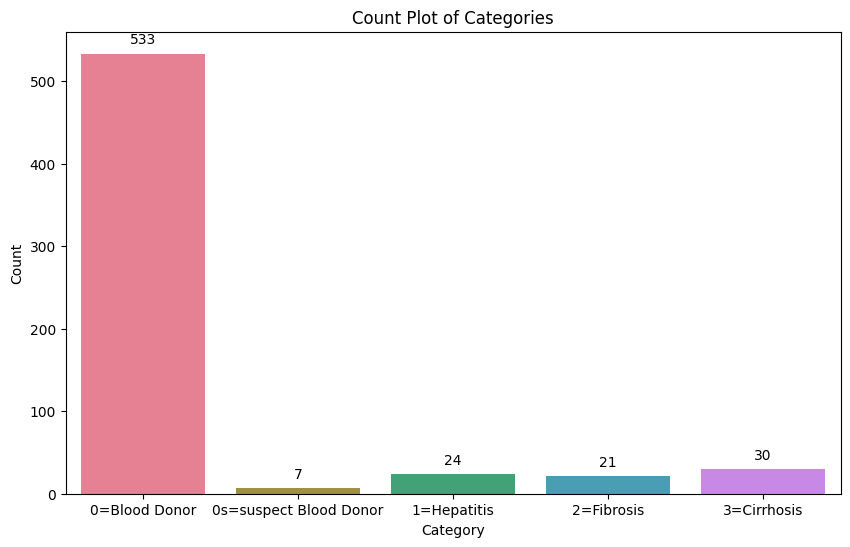

In [18]:
plt.figure(figsize=(10, 6))

# Define a custom color palette with different colors
custom_palette = sns.color_palette("husl", len(df['Category'].unique()))

# Create the count plot
ax = sns.countplot(x='Category', data=df, palette=custom_palette)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Plot of Categories')

# Add count labels on each column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
# Show the plot
plt.show()

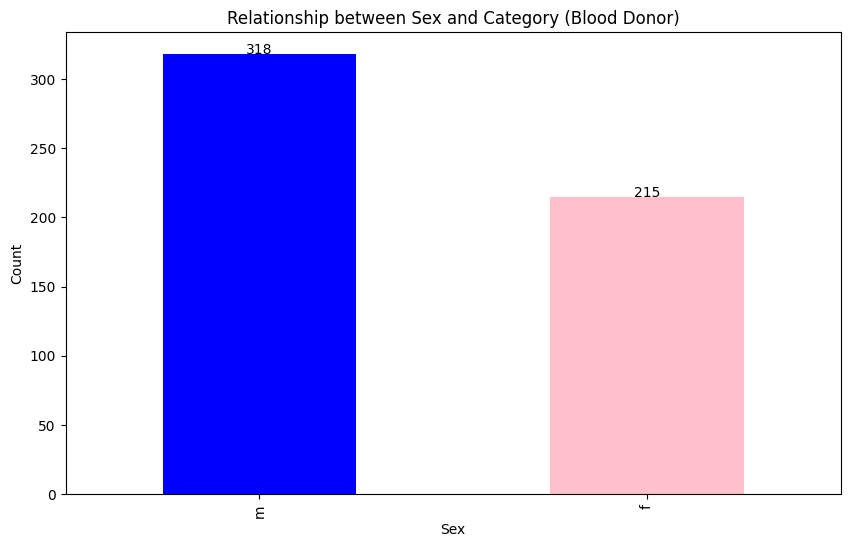

In [19]:
plt.figure(figsize=(10, 6))

blood_donor_data = df[df['Category'] == '0=Blood Donor']

# Group by Sex and count occurrences
grouped = blood_donor_data['Sex'].value_counts()

# Plot bar chart
grouped.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Category (Blood Donor)')

# Annotate bars with counts
for idx, value in enumerate(grouped):
    plt.text(idx, value + 0.1, str(value), ha='center')

plt.show()

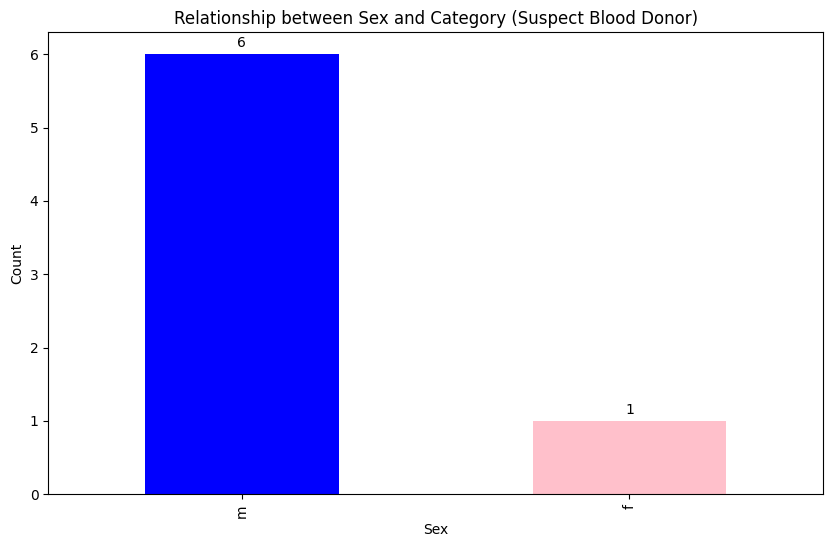

In [20]:
plt.figure(figsize=(10, 6))

blood_donor_data = df[df['Category'] == '0s=suspect Blood Donor']

# Group by Sex and count occurrences
grouped = blood_donor_data['Sex'].value_counts()

# Plot bar chart
grouped.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Category (Suspect Blood Donor)')

# Annotate bars with counts
for idx, value in enumerate(grouped):
    plt.text(idx, value + 0.1, str(value), ha='center')

plt.show()

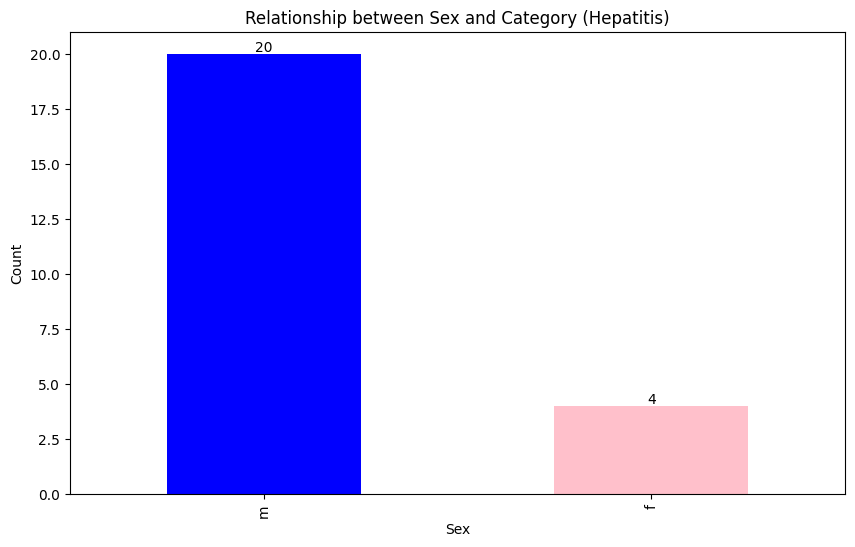

In [21]:
plt.figure(figsize=(10, 6))

blood_donor_data = df[df['Category'] == '1=Hepatitis']

# Group by Sex and count occurrences
grouped = blood_donor_data['Sex'].value_counts()

# Plot bar chart
grouped.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Category (Hepatitis)')

# Annotate bars with counts
for idx, value in enumerate(grouped):
    plt.text(idx, value + 0.1, str(value), ha='center')

plt.show()

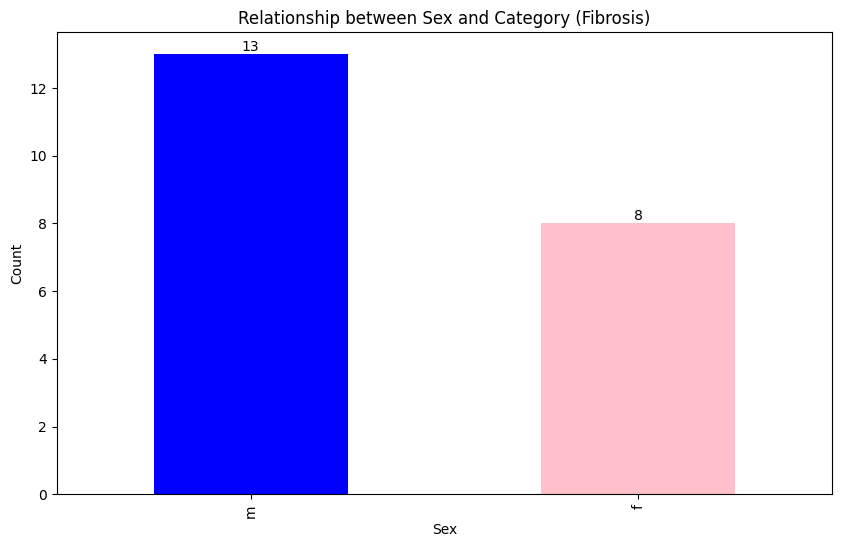

In [22]:
plt.figure(figsize=(10, 6))

blood_donor_data = df[df['Category'] == '2=Fibrosis']

# Group by Sex and count occurrences
grouped = blood_donor_data['Sex'].value_counts()

# Plot bar chart
grouped.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Category (Fibrosis)')

# Annotate bars with counts
for idx, value in enumerate(grouped):
    plt.text(idx, value + 0.1, str(value), ha='center')

plt.show()

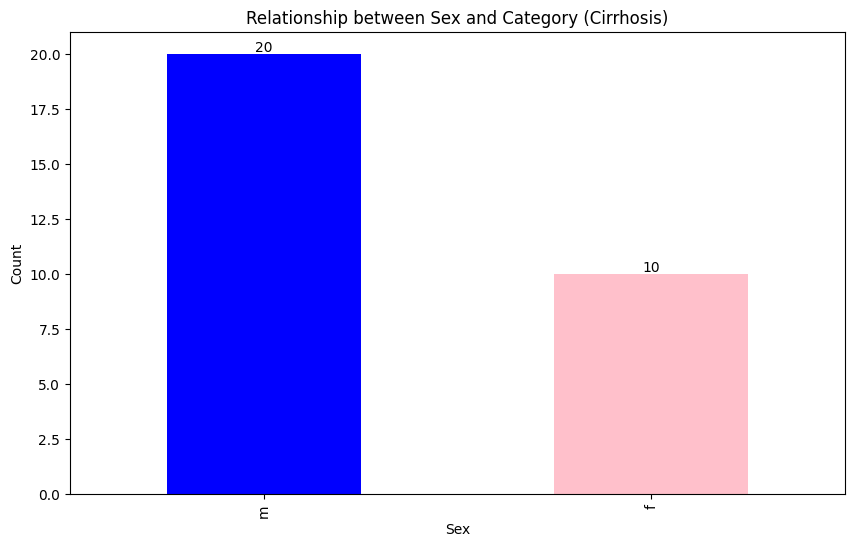

In [23]:
plt.figure(figsize=(10, 6))

blood_donor_data = df[df['Category'] == '3=Cirrhosis']

# Group by Sex and count occurrences
grouped = blood_donor_data['Sex'].value_counts()

# Plot bar chart
grouped.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship between Sex and Category (Cirrhosis)')

# Annotate bars with counts
for idx, value in enumerate(grouped):
    plt.text(idx, value + 0.1, str(value), ha='center')

plt.show()

=> Nam hiến máu nhiều hơn nữ
<br />
=> Nam mắc bệnh nhiều hơn nữ

<b>Do tập dữ liệu rất mất cân bằng, dữ liệu chủ yếu nằm ở nhãn Blood Donor, sẽ chủ yếu loại outliers ở nhãn này, các nhãn khác dữ liệu tầm ~25 phần tử nên sẽ hạn chế loại ngoại lai</b>
<br />
<b>Chỉ vẽ biểu đồ hộp để phân tích</b>

Ngoại lai từ boxplot được tìm theo thuật toán Tukey (như ô dưới), ngoại lai không phải lúc nào cũng là dữ liệu nhiễu nên không cần thiết phải loại

In [24]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

<h2>Age</h2>

In [56]:
np.sort(df['Age'].unique())

array([19, 23, 25, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 74, 75, 76, 77],
      dtype=int64)

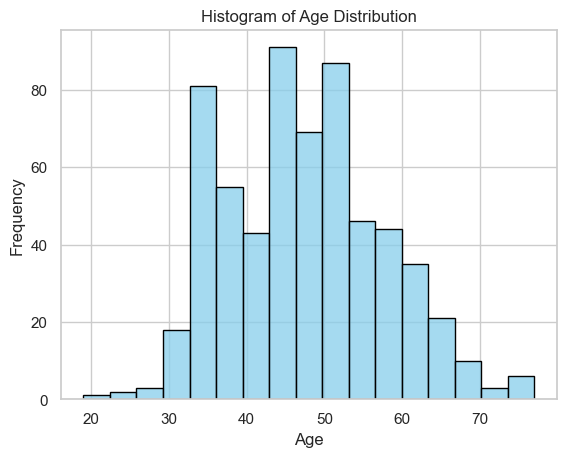

In [55]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["Age"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\3519328910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Age', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\3519328910.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='Age', palette=custom_palette)


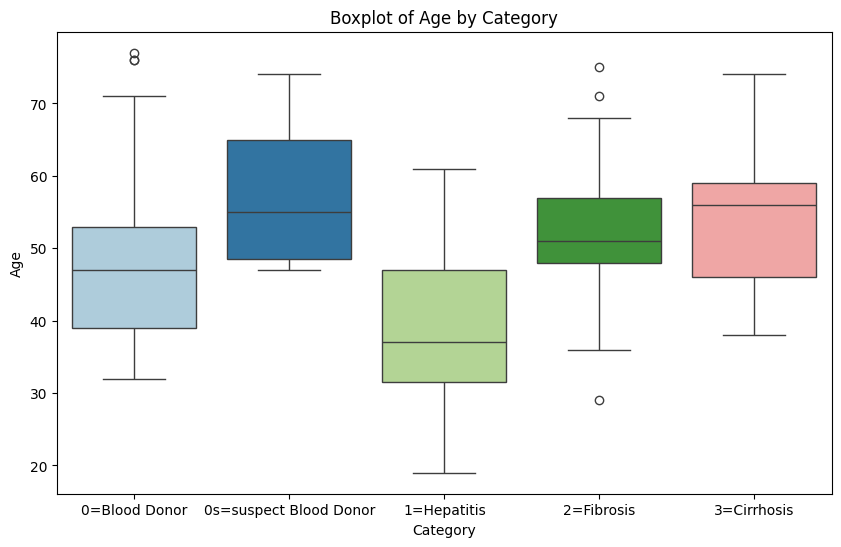

In [25]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Age', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('Age')
plt.title('Boxplot of Age by Category')
plt.show()

In [26]:
np.sort(df[df['Category'] == '0=Blood Donor']['Age'].unique())

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 70, 71, 76, 77], dtype=int64)

Đọc biểu đồ hộp:
<br />
Đối với hộp đầu tiên (nhãn = Blood Donor):
<br />
Trung vị của biểu đồ khoảng 47, nghĩa là có 50% phần tử mang giá trị dưới/trên 47 (lằn ở giữa)
<br />
25% phần tử mang giá trị dưới 39
<br />
75% phần tử mang giá trị dưới 54

<h2>ALB</h2>

In [57]:
np.sort(df['ALB'].unique())

array([14.9, 19.3, 20. , 20.3, 21.6, 22.5, 23. , 24. , 24.9, 26.2, 26.3,
       27. , 27.3, 27.8, 28.1, 29. , 29.2, 30. , 31. , 31.4, 32. , 32.4,
       32.6, 33. , 33.2, 33.7, 33.9, 34. , 34.3, 34.6, 34.7, 34.8, 34.9,
       35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 36. , 36.1,
       36.2, 36.3, 36.4, 36.6, 36.7, 36.8, 36.9, 37. , 37.2, 37.3, 37.4,
       37.5, 37.6, 37.8, 37.9, 38. , 38.1, 38.2, 38.3, 38.4, 38.5, 38.6,
       38.7, 38.8, 38.9, 39. , 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7,
       39.8, 39.9, 40. , 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8,
       40.9, 41. , 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9,
       42. , 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43. ,
       43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. , 44.1,
       44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 45. , 45.1, 45.2, 45.3, 45.4,
       45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2, 46.3, 46.4, 46.5,
       46.6, 46.7, 46.8, 46.9, 47. , 47.2, 47.3, 47

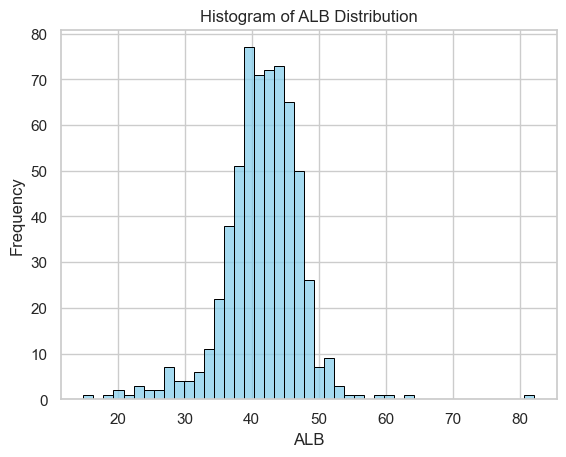

In [67]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["ALB"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('ALB')
plt.ylabel('Frequency')
plt.title('Histogram of ALB Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1553049989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='ALB', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1553049989.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='ALB', palette=custom_palette)


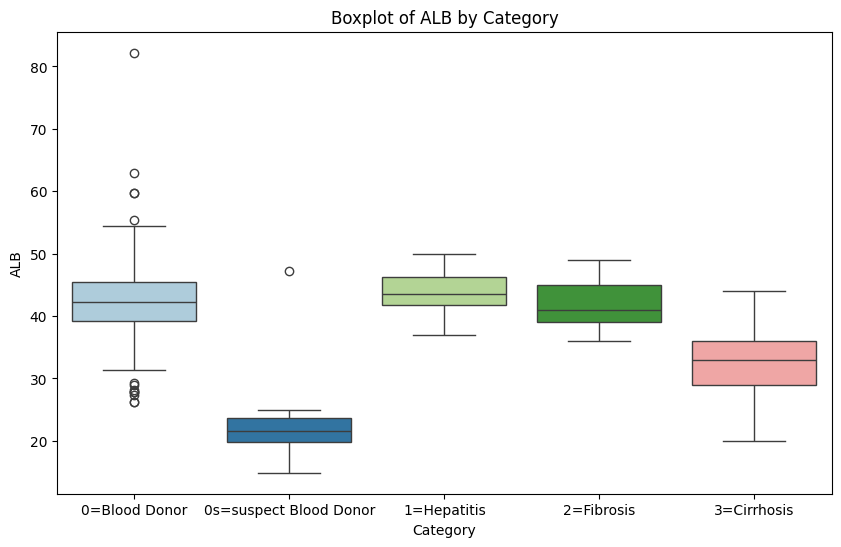

In [27]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='ALB', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('ALB')
plt.title('Boxplot of ALB by Category')
plt.show()

In [28]:
np.sort(df[df['Category'] == '0=Blood Donor']['ALB'].unique())

array([26.2, 26.3, 27.3, 27.8, 28.1, 29. , 29.2, 31.4, 32. , 32.4, 32.6,
       33. , 33.2, 33.7, 33.9, 34.3, 34.6, 34.7, 34.8, 34.9, 35.1, 35.2,
       35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 36. , 36.1, 36.2, 36.3, 36.4,
       36.6, 36.7, 36.8, 36.9, 37. , 37.2, 37.3, 37.4, 37.5, 37.6, 37.8,
       37.9, 38. , 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9,
       39. , 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40. ,
       40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41. , 41.1,
       41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42. , 42.1, 42.2,
       42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43. , 43.1, 43.2, 43.3,
       43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. , 44.1, 44.3, 44.4, 44.5,
       44.6, 44.7, 44.8, 45. , 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7,
       45.8, 45.9, 46. , 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8,
       46.9, 47. , 47.2, 47.3, 47.4, 47.6, 47.7, 47.8, 47.9, 48. , 48.1,
       48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49

<h2>ALP</h2>

In [58]:
np.sort(df['ALP'].unique())

array([ 11.3,  19.1,  20.6,  22.9,  26.9,  27. ,  27.3,  27.5,  28.9,
        29.6,  29.7,  30.7,  31.2,  31.3,  32.4,  32.7,  32.9,  34.1,
        34.4,  34.5,  34.6,  35.2,  35.7,  36.3,  36.5,  36.7,  37. ,
        37.1,  37.2,  37.5,  37.9,  38.2,  39.3,  39.6,  39.8,  40.3,
        40.4,  40.6,  40.7,  40.9,  41. ,  41.2,  41.3,  41.4,  41.6,
        41.8,  41.9,  42. ,  42.2,  42.4,  42.7,  42.8,  43. ,  43.1,
        43.3,  43.4,  43.5,  43.7,  43.8,  43.9,  44.3,  44.8,  44.9,
        45. ,  45.2,  45.3,  45.4,  45.6,  45.7,  45.8,  45.9,  46.1,
        46.4,  46.6,  46.8,  47.2,  47.3,  47.4,  47.5,  48.2,  48.3,
        48.5,  48.6,  48.8,  48.9,  49.1,  49.2,  49.4,  49.7,  49.8,
        50. ,  50.1,  50.2,  50.3,  50.6,  50.7,  50.8,  51. ,  51.2,
        51.3,  51.4,  51.6,  51.7,  52. ,  52.1,  52.2,  52.3,  52.5,
        52.7,  52.9,  53. ,  53.3,  53.4,  53.5,  53.9,  54. ,  54.1,
        54.3,  54.4,  54.5,  54.7,  54.8,  54.9,  55. ,  55.1,  55.3,
        55.8,  55.9,

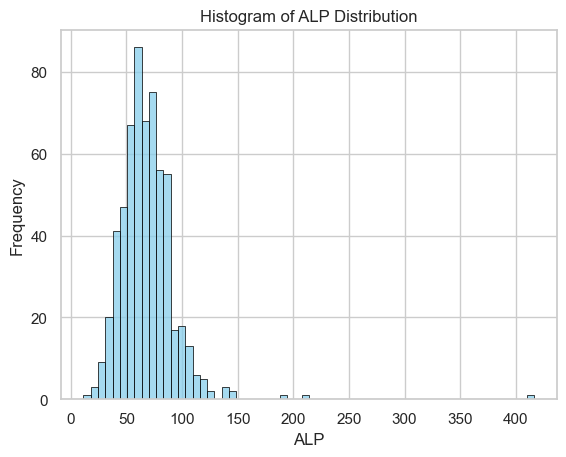

In [68]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["ALP"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('ALP')
plt.ylabel('Frequency')
plt.title('Histogram of ALP Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\809801932.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='ALP', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\809801932.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='ALP', palette=custom_palette)


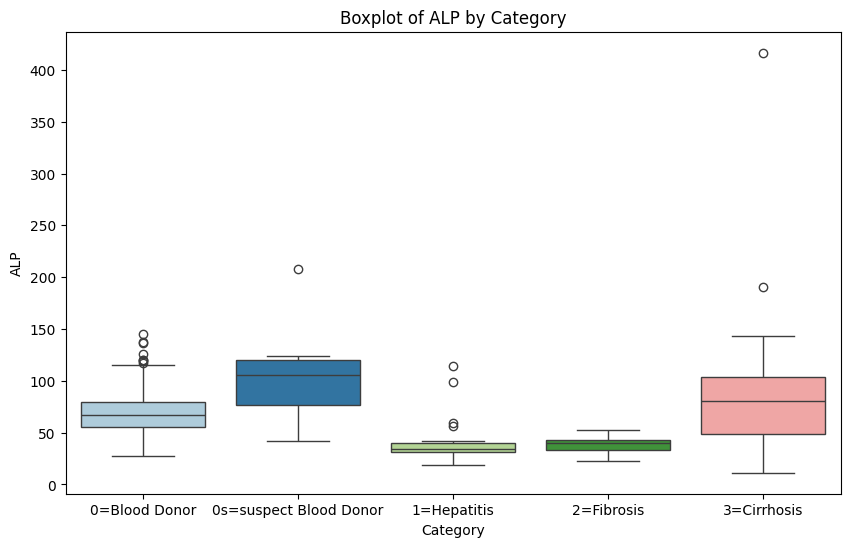

In [29]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='ALP', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('ALP')
plt.title('Boxplot of ALP by Category')
plt.show()

In [30]:
np.sort(df[df['Category'] == '3=Cirrhosis']['ALP'].unique())

array([ 11.3,  29.6,  34.1,  37. ,  40.4,  46.4,  49.7,  51.3,  66. ,
        69.6,  73.8,  79. ,  81.1,  85.3,  86.3,  87.3, 102.8, 102.9,
       105.6, 109.6, 137.8, 143.1, 190.7, 416.6,   nan])

Chỉ số <b>ALP=416.6</b> từ nhãn Category=Cirrhosis quá cao nên sẽ loại bỏ

<h2>ALT</h2>

In [59]:
np.sort(df['ALT'].unique())

array([  0.9,   1.2,   1.3,   2.1,   2.3,   2.4,   2.5,   2.9,   3.5,
         3.7,   3.8,   4. ,   4.5,   4.8,   5. ,   5.1,   5.2,   5.4,
         5.9,   7. ,   7.1,   7.3,   7.4,   7.7,   8. ,   8.2,   8.3,
         8.6,   8.9,   9. ,   9.2,   9.4,   9.5,   9.8,  10. ,  10.1,
        10.2,  10.3,  10.5,  10.8,  10.9,  11.1,  11.2,  11.3,  11.5,
        11.6,  11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.4,  12.6,
        12.8,  12.9,  13.1,  13.2,  13.3,  13.4,  13.5,  13.7,  13.8,
        14. ,  14.1,  14.2,  14.3,  14.4,  14.5,  14.6,  14.7,  14.8,
        14.9,  15. ,  15.1,  15.2,  15.3,  15.4,  15.5,  15.6,  15.7,
        15.8,  15.9,  16.2,  16.3,  16.4,  16.5,  16.6,  16.8,  16.9,
        17. ,  17.1,  17.2,  17.3,  17.4,  17.5,  17.6,  17.7,  17.9,
        18. ,  18.1,  18.2,  18.3,  18.4,  18.5,  18.6,  18.7,  18.8,
        19. ,  19.1,  19.2,  19.3,  19.4,  19.5,  19.6,  19.7,  19.9,
        20. ,  20.1,  20.2,  20.3,  20.4,  20.5,  20.6,  20.7,  20.8,
        20.9,  21. ,

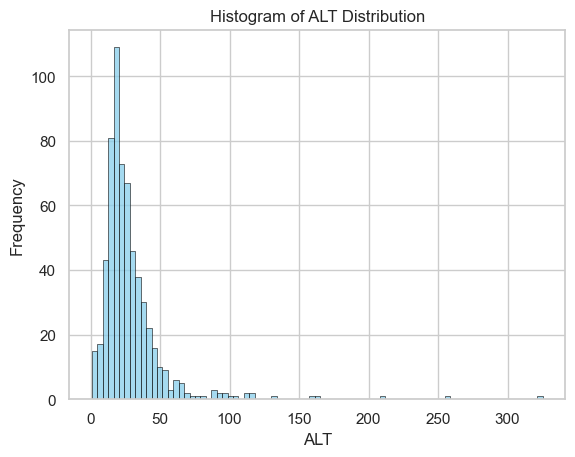

In [69]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["ALT"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('ALT')
plt.ylabel('Frequency')
plt.title('Histogram of ALT Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\3419157499.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='ALT', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\3419157499.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='ALT', palette=custom_palette)


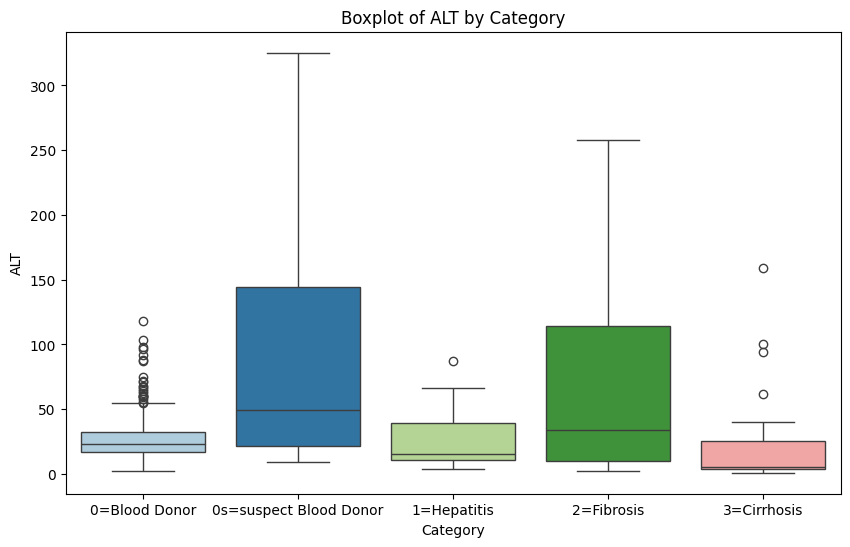

In [31]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='ALT', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('ALT')
plt.title('Boxplot of ALT by Category')
plt.show()

Đối với chỉ số ALT hầu hết các giá trị đều có vẻ chính xác nên không cần thiết phải loại bỏ
<br />
Riêng nhãn có giá trị "0s=suspect Blood Donor", xét cho tới giờ có vẻ bất thường không hợp lý, có ít dữ liệu (7 phần tử), không liên quan tới bài toán đang xét (các phần tử thuộc nhãn này có lẽ là các dữ liệu mất nhãn) nên sẽ loại bỏ

<h2>AST</h2>

In [60]:
np.sort(df['AST'].unique())

array([ 10.6,  12. ,  12.2,  13.1,  13.3,  14.1,  14.7,  14.8,  14.9,
        15. ,  15.2,  15.3,  15.7,  15.9,  16. ,  16.1,  16.2,  16.3,
        16.4,  16.5,  16.6,  16.7,  16.8,  16.9,  17. ,  17.1,  17.2,
        17.3,  17.4,  17.5,  17.6,  17.7,  17.8,  17.9,  18. ,  18.1,
        18.3,  18.4,  18.6,  18.8,  18.9,  19. ,  19.1,  19.2,  19.3,
        19.4,  19.5,  19.6,  19.7,  19.8,  19.9,  20. ,  20.1,  20.2,
        20.3,  20.4,  20.5,  20.6,  20.7,  20.8,  21. ,  21.1,  21.2,
        21.3,  21.4,  21.5,  21.6,  21.7,  21.8,  21.9,  22. ,  22.1,
        22.2,  22.3,  22.4,  22.5,  22.6,  22.7,  22.8,  22.9,  23. ,
        23.2,  23.3,  23.4,  23.5,  23.6,  23.7,  23.8,  23.9,  24. ,
        24.1,  24.2,  24.3,  24.4,  24.5,  24.6,  24.7,  24.8,  24.9,
        25. ,  25.1,  25.2,  25.3,  25.4,  25.5,  25.6,  25.7,  25.8,
        25.9,  26. ,  26.1,  26.2,  26.3,  26.4,  26.5,  26.6,  26.7,
        26.8,  27. ,  27.1,  27.2,  27.3,  27.4,  27.5,  27.6,  27.7,
        27.8,  27.9,

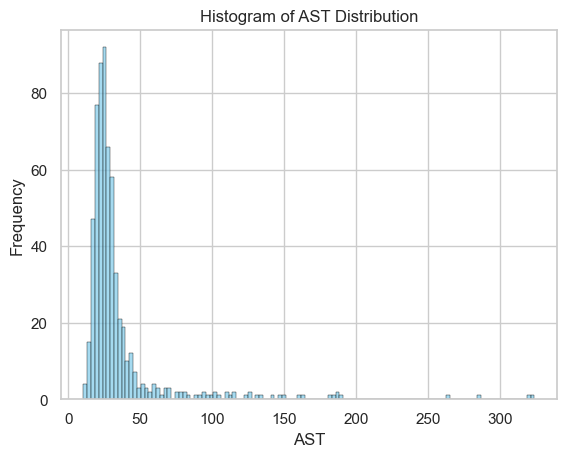

In [70]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["AST"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('AST')
plt.ylabel('Frequency')
plt.title('Histogram of AST Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1766469730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='AST', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1766469730.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='AST', palette=custom_palette)


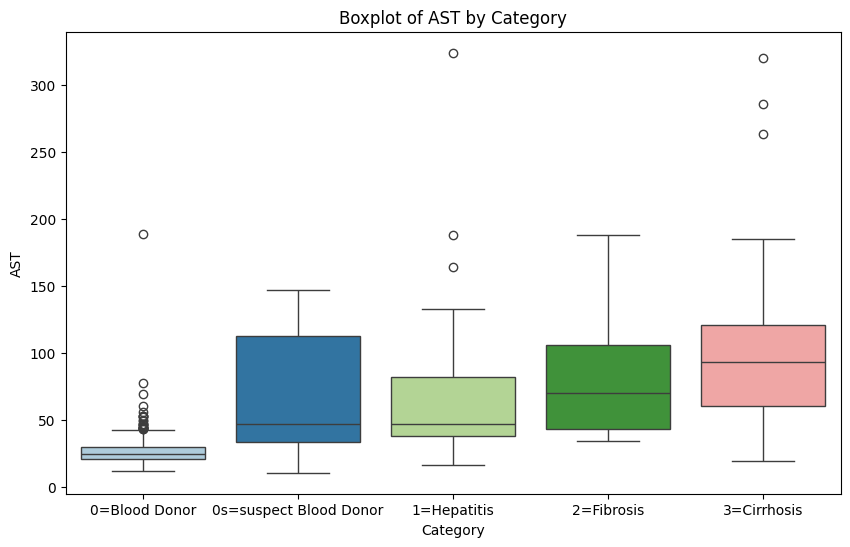

In [32]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='AST', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('AST')
plt.title('Boxplot of AST by Category')
plt.show()

In [33]:
np.sort(df[df['Category'] == '0=Blood Donor']['AST'].unique())

array([ 12. ,  12.2,  13.1,  13.3,  14.1,  14.7,  14.8,  14.9,  15. ,
        15.2,  15.3,  15.7,  15.9,  16. ,  16.1,  16.2,  16.3,  16.4,
        16.5,  16.6,  16.8,  16.9,  17. ,  17.1,  17.2,  17.3,  17.4,
        17.5,  17.6,  17.7,  17.8,  17.9,  18. ,  18.1,  18.3,  18.4,
        18.6,  18.8,  18.9,  19. ,  19.1,  19.2,  19.3,  19.4,  19.5,
        19.6,  19.7,  19.8,  19.9,  20. ,  20.1,  20.2,  20.3,  20.4,
        20.5,  20.6,  20.7,  20.8,  21. ,  21.1,  21.2,  21.3,  21.4,
        21.5,  21.6,  21.7,  21.8,  21.9,  22. ,  22.1,  22.2,  22.3,
        22.4,  22.5,  22.6,  22.7,  22.8,  22.9,  23. ,  23.2,  23.3,
        23.4,  23.5,  23.6,  23.7,  23.8,  23.9,  24. ,  24.1,  24.2,
        24.3,  24.4,  24.5,  24.6,  24.7,  24.8,  24.9,  25. ,  25.1,
        25.2,  25.3,  25.4,  25.5,  25.6,  25.7,  25.8,  25.9,  26. ,
        26.1,  26.2,  26.3,  26.4,  26.5,  26.6,  26.7,  26.8,  27. ,
        27.1,  27.2,  27.3,  27.4,  27.5,  27.6,  27.7,  27.8,  27.9,
        28. ,  28.1,

<h2>BIL</h2>

In [61]:
np.sort(df['BIL'].unique())

array([  0.8,   1.8,   2. ,   2.1,   2.2,   2.3,   2.4,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
         9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
        10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.8,  10.9,
        11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,  11.7,  11.8,
        11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,  12.7,  12.8,
        13. ,  13.1,  13.2,  13.4,  13.5,  13.8,  13.9,  14. ,  14.1,
        14.5,  14.8,  14.9,  15. ,  15.2,  15.3,  15.6,  15.7,  15.8,
        16. ,  16.1,

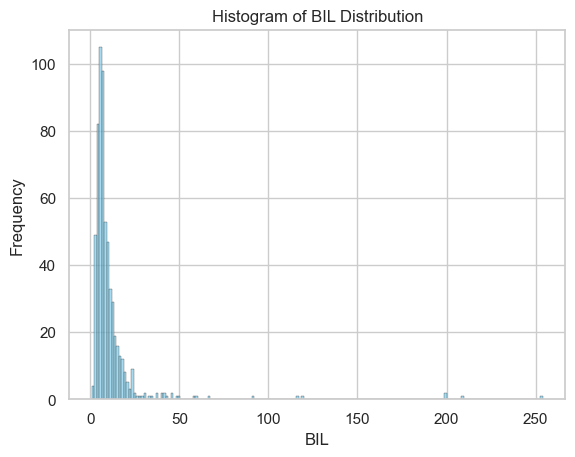

In [71]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["BIL"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('BIL')
plt.ylabel('Frequency')
plt.title('Histogram of BIL Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\3212849449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='BIL', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\3212849449.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='BIL', palette=custom_palette)


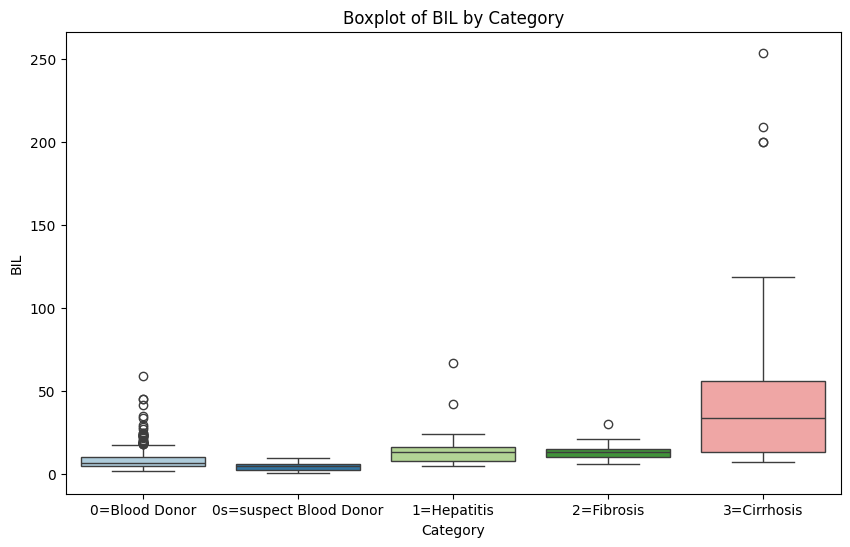

In [34]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='BIL', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('BIL')
plt.title('Boxplot of BIL by Category')
plt.show()

<h2>CHE</h2>

In [62]:
np.sort(df['CHE'].unique())

array([ 1.42,  1.48,  1.54,  1.57,  1.66,  1.72,  1.73,  1.8 ,  1.88,
        2.  ,  2.29,  2.47,  2.5 ,  3.29,  3.44,  3.56,  3.61,  3.65,
        3.75,  3.9 ,  3.99,  4.01,  4.02,  4.15,  4.18,  4.31,  4.32,
        4.37,  4.38,  4.52,  4.55,  4.63,  4.72,  4.8 ,  4.83,  4.91,
        4.93,  4.95,  4.97,  5.02,  5.15,  5.19,  5.23,  5.27,  5.28,
        5.3 ,  5.33,  5.35,  5.38,  5.4 ,  5.46,  5.49,  5.51,  5.57,
        5.58,  5.6 ,  5.61,  5.62,  5.63,  5.68,  5.7 ,  5.74,  5.75,
        5.77,  5.78,  5.79,  5.82,  5.95,  5.96,  5.98,  5.99,  6.  ,
        6.02,  6.03,  6.06,  6.08,  6.09,  6.1 ,  6.15,  6.17,  6.23,
        6.26,  6.29,  6.3 ,  6.33,  6.35,  6.39,  6.43,  6.44,  6.45,
        6.46,  6.47,  6.49,  6.5 ,  6.55,  6.57,  6.58,  6.59,  6.6 ,
        6.61,  6.63,  6.65,  6.68,  6.7 ,  6.71,  6.72,  6.74,  6.75,
        6.78,  6.79,  6.8 ,  6.82,  6.83,  6.88,  6.89,  6.9 ,  6.91,
        6.92,  6.93,  6.94,  6.95,  6.97,  6.98,  6.99,  7.  ,  7.01,
        7.05,  7.06,

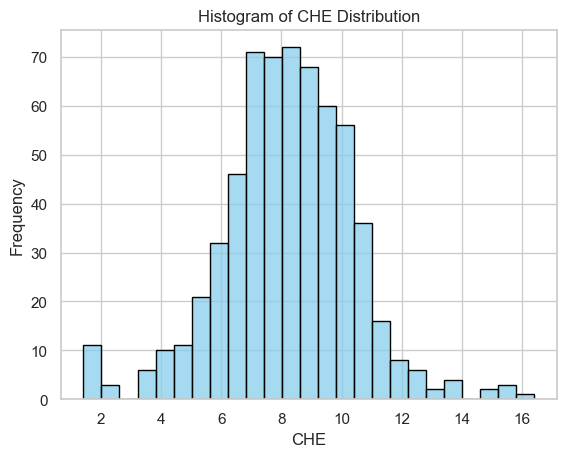

In [72]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["CHE"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('CHE')
plt.ylabel('Frequency')
plt.title('Histogram of CHE Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1556186231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='CHE', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1556186231.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='CHE', palette=custom_palette)


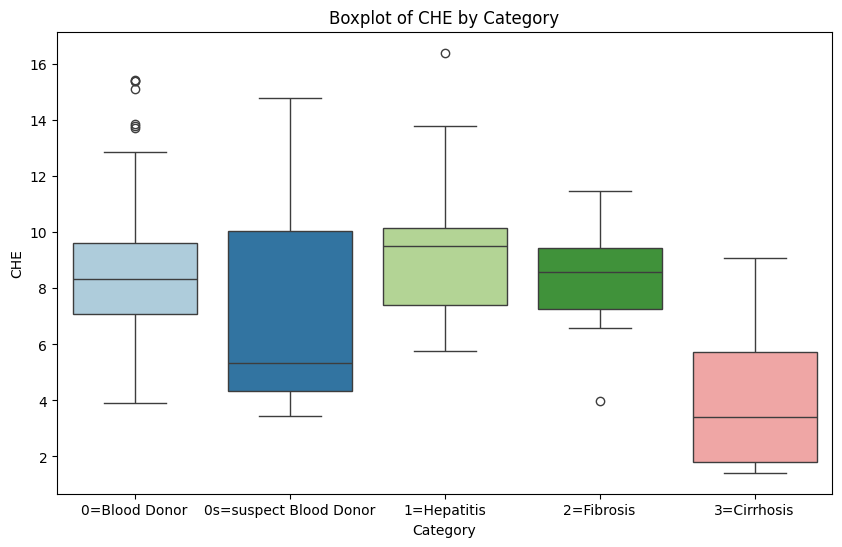

In [35]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='CHE', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('CHE')
plt.title('Boxplot of CHE by Category')
plt.show()

<h2>CHOL</h2>

In [63]:
np.sort(df['CHOL'].unique())

array([1.43, 2.4 , 2.61, 2.79, 2.86, 3.01, 3.02, 3.09, 3.1 , 3.19, 3.2 ,
       3.22, 3.23, 3.25, 3.29, 3.34, 3.38, 3.5 , 3.51, 3.53, 3.54, 3.57,
       3.6 , 3.61, 3.62, 3.63, 3.68, 3.69, 3.71, 3.75, 3.78, 3.8 , 3.81,
       3.82, 3.87, 3.9 , 3.91, 3.92, 3.93, 3.95, 3.96, 3.97, 3.98, 4.  ,
       4.01, 4.02, 4.03, 4.05, 4.06, 4.07, 4.08, 4.1 , 4.12, 4.13, 4.14,
       4.15, 4.17, 4.18, 4.2 , 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28,
       4.29, 4.3 , 4.31, 4.32, 4.33, 4.35, 4.36, 4.37, 4.38, 4.39, 4.41,
       4.42, 4.43, 4.44, 4.45, 4.46, 4.48, 4.49, 4.5 , 4.51, 4.52, 4.55,
       4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62, 4.63, 4.64, 4.65, 4.66,
       4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73, 4.74, 4.78, 4.79, 4.8 ,
       4.81, 4.82, 4.83, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92,
       4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.  , 5.02, 5.04, 5.05,
       5.06, 5.07, 5.08, 5.09, 5.1 , 5.11, 5.12, 5.15, 5.16, 5.17, 5.18,
       5.19, 5.2 , 5.22, 5.23, 5.24, 5.25, 5.26, 5.

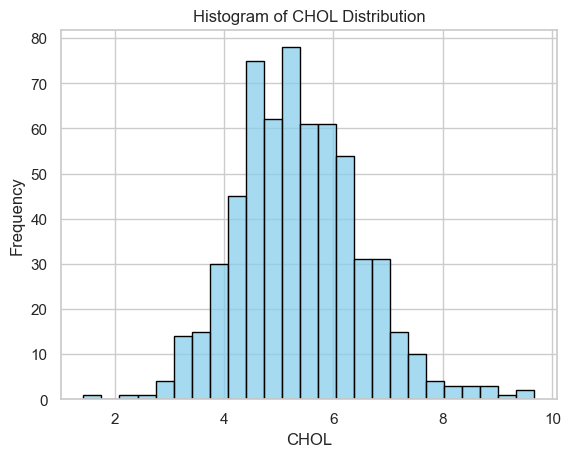

In [74]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["CHOL"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('CHOL')
plt.ylabel('Frequency')
plt.title('Histogram of CHOL Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\2028931909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='CHOL', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\2028931909.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='CHOL', palette=custom_palette)


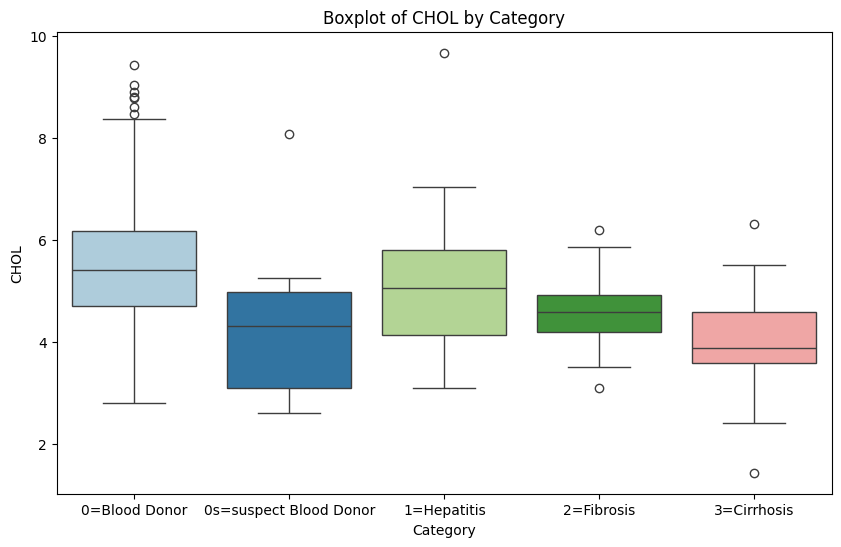

In [36]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='CHOL', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('CHOL')
plt.title('Boxplot of CHOL by Category')
plt.show()

<h2>CREA</h2>

In [66]:
np.sort(df['CREA'].unique())

array([   8. ,    9. ,   29. ,   32. ,   40. ,   41. ,   45.4,   48. ,
         49.6,   50. ,   51. ,   52. ,   53. ,   54. ,   55. ,   55.2,
         55.7,   56. ,   56.6,   57. ,   57.7,   58. ,   58.3,   58.8,
         59. ,   60. ,   60.5,   60.8,   61. ,   61.9,   62. ,   62.7,
         63. ,   64. ,   65. ,   65.3,   66. ,   66.4,   66.7,   66.9,
         67. ,   68. ,   68.6,   69. ,   69.2,   70. ,   70.9,   71. ,
         71.4,   71.7,   72. ,   72.3,   73. ,   74. ,   75. ,   75.3,
         75.9,   76. ,   76.2,   76.7,   77. ,   77.9,   78. ,   79. ,
         79.3,   80. ,   80.9,   81. ,   81.2,   81.5,   81.8,   82. ,
         82.3,   83. ,   84. ,   85. ,   86. ,   87. ,   88. ,   89. ,
         89.1,   90. ,   91. ,   92. ,   93. ,   94. ,   95. ,   96. ,
         97. ,   97.7,   98. ,   99. ,  100. ,  101. ,  102. ,  103. ,
        105. ,  106. ,  106.4,  107. ,  108. ,  109. ,  110. ,  111. ,
        112. ,  113. ,  114. ,  118.2,  119. ,  127. ,  136.1,  147.3,
      

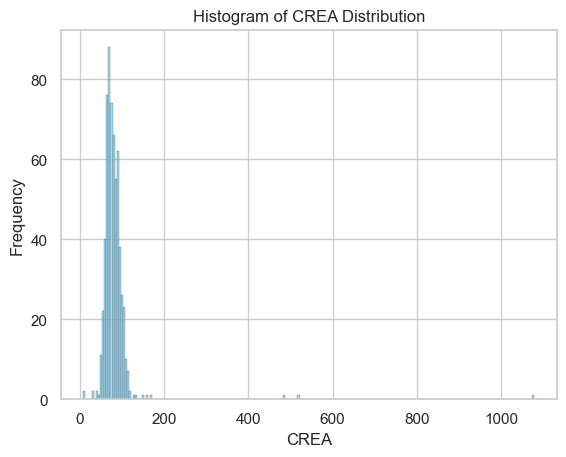

In [75]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["CREA"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('CREA')
plt.ylabel('Frequency')
plt.title('Histogram of CREA Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1740316650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='CREA', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1740316650.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='CREA', palette=custom_palette)


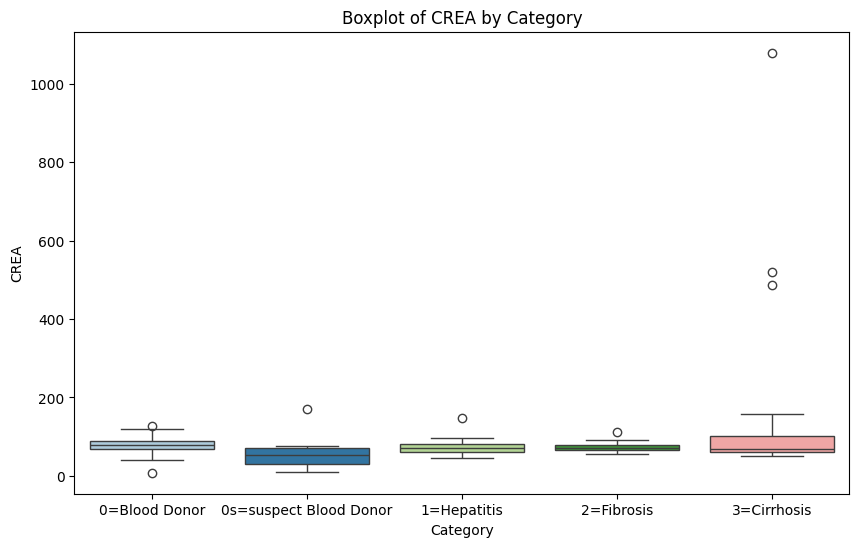

In [37]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='CREA', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('CREA')
plt.title('Boxplot of CREA by Category')
plt.show()

<h2>GGT</h2>

In [64]:
np.sort(df['GGT'].unique())

array([  4.5,   4.9,   6.4,   7. ,   7.1,   7.2,   7.4,   7.6,   7.9,
         8. ,   8.1,   8.8,   9. ,   9.1,   9.2,   9.3,   9.5,   9.7,
         9.8,   9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,
        10.8,  11. ,  11.2,  11.3,  11.4,  11.5,  11.7,  11.8,  11.9,
        12. ,  12.1,  12.3,  12.4,  12.5,  12.7,  12.9,  13. ,  13.1,
        13.3,  13.4,  13.5,  13.6,  13.7,  13.8,  13.9,  14. ,  14.1,
        14.2,  14.3,  14.5,  14.6,  14.7,  14.8,  14.9,  15.1,  15.2,
        15.4,  15.6,  15.7,  15.8,  15.9,  16. ,  16.2,  16.3,  16.4,
        16.5,  16.6,  16.7,  16.8,  16.9,  17. ,  17.1,  17.2,  17.3,
        17.4,  17.5,  17.6,  17.7,  17.8,  18.2,  18.3,  18.4,  18.5,
        18.6,  18.7,  18.9,  19. ,  19.1,  19.2,  19.4,  19.5,  19.6,
        19.7,  19.8,  19.9,  20. ,  20.1,  20.3,  20.6,  20.7,  20.8,
        20.9,  21.1,  21.2,  21.3,  21.4,  21.5,  21.6,  21.7,  21.8,
        21.9,  22.1,  22.2,  22.3,  22.4,  22.6,  22.7,  22.8,  22.9,
        23. ,  23.1,

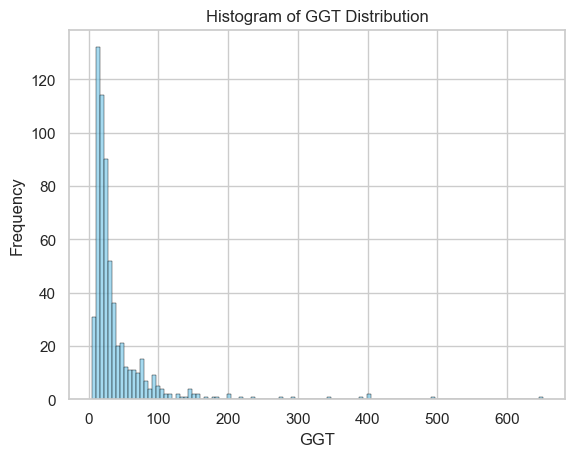

In [76]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["GGT"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('GGT')
plt.ylabel('Frequency')
plt.title('Histogram of GGT Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\4025462078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='GGT', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\4025462078.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='GGT', palette=custom_palette)


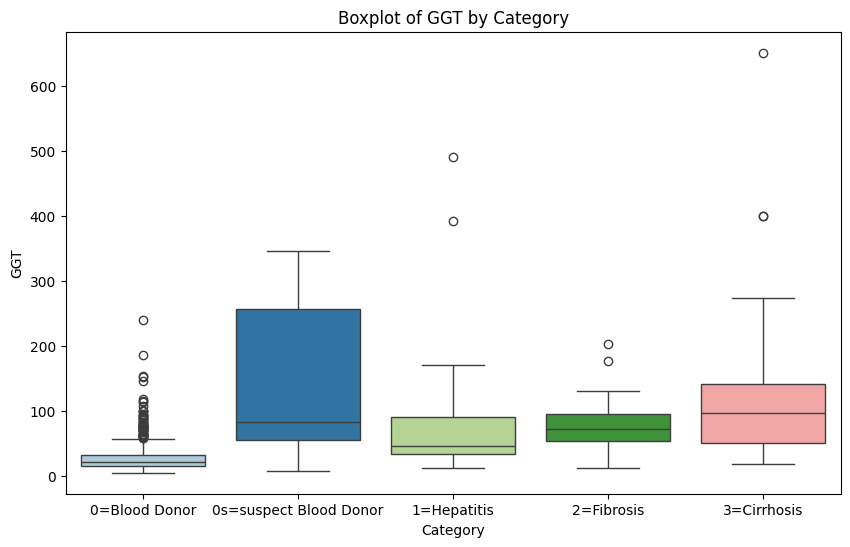

In [38]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='GGT', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('GGT')
plt.title('Boxplot of GGT by Category')
plt.show()

<h2>PROT</h2>

In [65]:
np.sort(df['PROT'].unique())

array([44.8, 47. , 47.8, 51. , 53.1, 53.2, 54.2, 56.3, 56.9, 57. , 57.1,
       57.5, 58.1, 58.5, 58.6, 60.5, 60.6, 62.1, 62.3, 62.4, 62.5, 62.8,
       63. , 63.1, 63.2, 63.4, 64.1, 64.2, 64.3, 64.4, 64.5, 64.7, 64.8,
       64.9, 65. , 65.2, 65.3, 65.4, 65.5, 65.6, 65.8, 66. , 66.1, 66.2,
       66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67. , 67.1, 67.2, 67.4,
       67.5, 67.7, 67.8, 67.9, 68. , 68.1, 68.2, 68.3, 68.4, 68.5, 68.6,
       68.7, 68.8, 68.9, 69. , 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7,
       69.8, 69.9, 70. , 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8,
       70.9, 71. , 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9,
       72. , 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73. ,
       73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74. , 74.1,
       74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75. , 75.1, 75.2,
       75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76. , 76.1, 76.2, 76.3,
       76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77. , 77

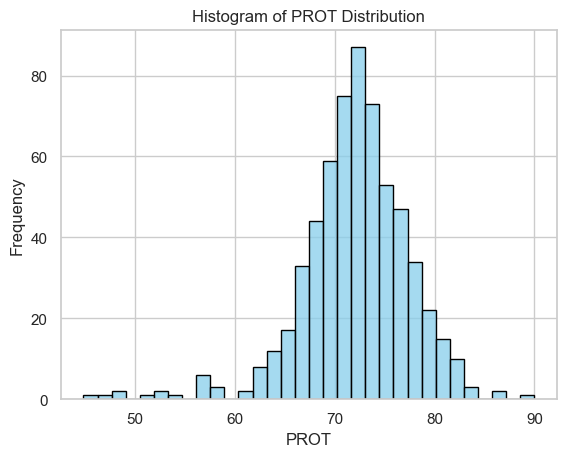

In [77]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
sns.histplot(data=df["PROT"], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('PROT')
plt.ylabel('Frequency')
plt.title('Histogram of PROT Distribution')

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1368464484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='PROT', palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_12432\1368464484.py:6: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='Category', y='PROT', palette=custom_palette)


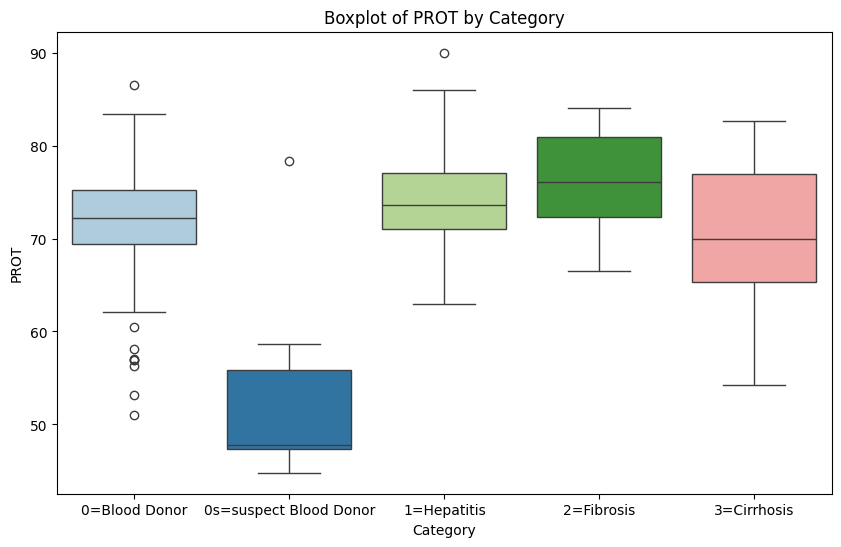

In [39]:
# Custom color palette
custom_palette = sns.color_palette("Paired")

# Create boxplot for Age by Category with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='PROT', palette=custom_palette)
plt.xlabel('Category')
plt.ylabel('PROT')
plt.title('Boxplot of PROT by Category')
plt.show()

<h2>Một số biểu đồ phân tán thể hiện mối tương quan giữa Giới tính, Tuổi và một số chỉ số sinh hóa</h2>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = df.dropna()

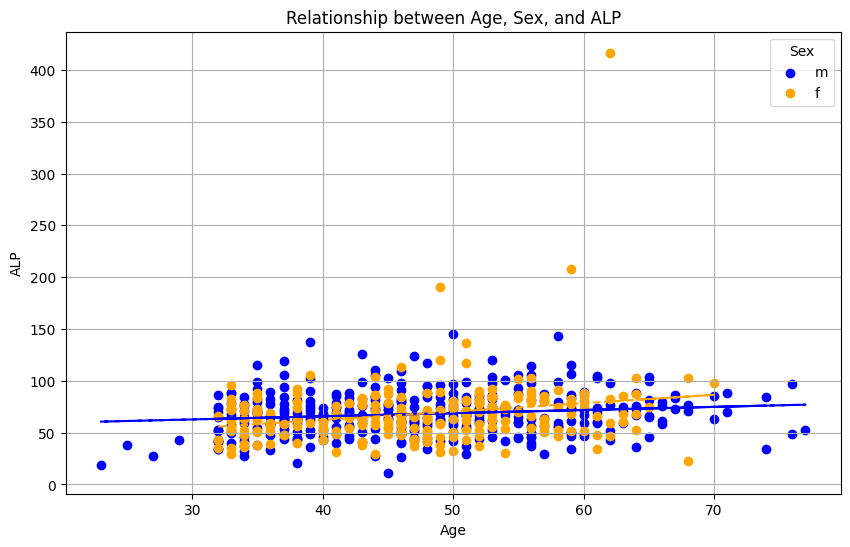

In [14]:
# Define colors for each sex
colors = {'m': 'blue', 'f': 'orange'}

# Create scatter plot
plt.figure(figsize=(10, 6))
for sex, color in colors.items():
    # Scatter plot
    plt.scatter(df[df['Sex'] == sex]['Age'], df[df['Sex'] == sex]['ALP'], label=sex, color=color)
    
    # Fit linear regression
    X = df[df['Sex'] == sex]['Age'].values.reshape(-1, 1)
    y = df[df['Sex'] == sex]['ALP'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot linear regression line
    plt.plot(X, model.predict(X), color=color, linestyle='--')

plt.xlabel('Age')
plt.ylabel('ALP')
plt.title('Relationship between Age, Sex, and ALP')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

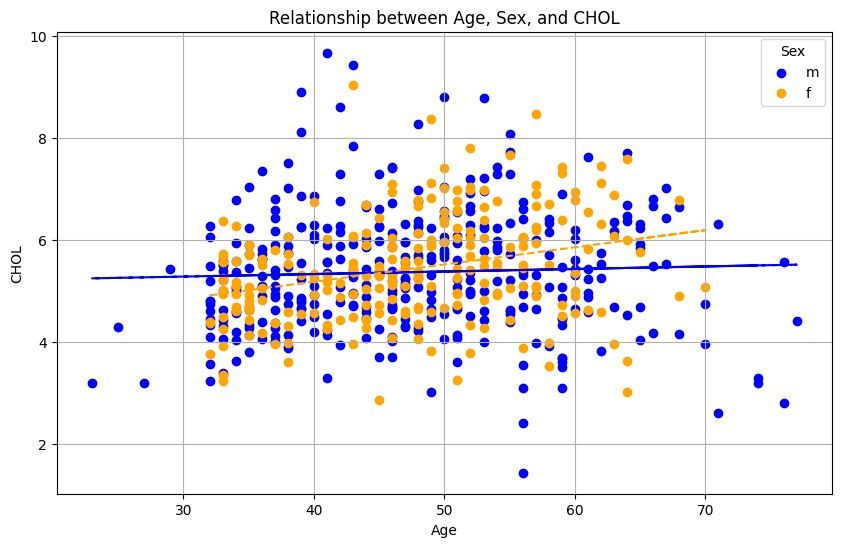

In [13]:
# Define colors for each sex
colors = {'m': 'blue', 'f': 'orange'}

# Create scatter plot
plt.figure(figsize=(10, 6))
for sex, color in colors.items():
    # Scatter plot
    plt.scatter(df[df['Sex'] == sex]['Age'], df[df['Sex'] == sex]['CHOL'], label=sex, color=color)
    
    # Fit linear regression
    X = df[df['Sex'] == sex]['Age'].values.reshape(-1, 1)
    y = df[df['Sex'] == sex]['CHOL'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot linear regression line
    plt.plot(X, model.predict(X), color=color, linestyle='--')

plt.xlabel('Age')
plt.ylabel('CHOL')
plt.title('Relationship between Age, Sex, and CHOL')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

<b>Vẽ thêm ALB - CHE, ALB - PROT, với mấy cái nào tuyến tính ở dưới</b>

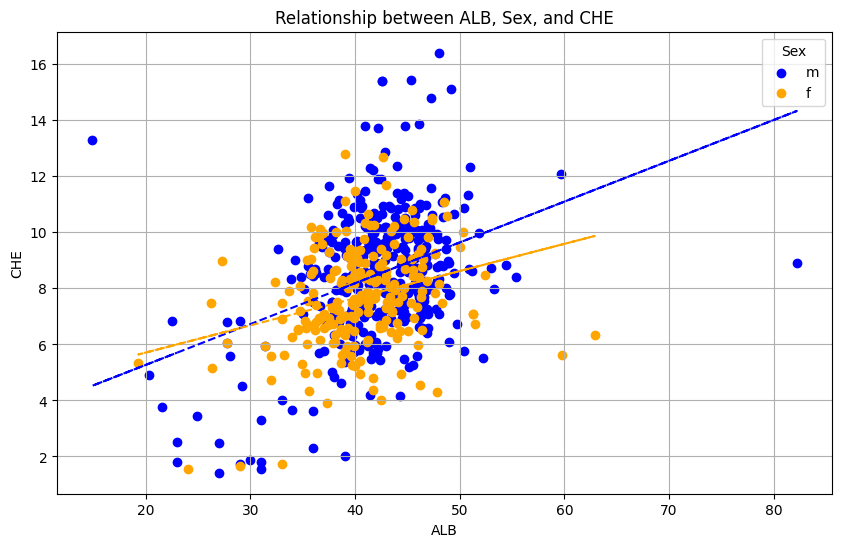

In [12]:
# Define colors for each sex
colors = {'m': 'blue', 'f': 'orange'}

# Create scatter plot
plt.figure(figsize=(10, 6))
for sex, color in colors.items():
    # Scatter plot
    plt.scatter(df[df['Sex'] == sex]['ALB'], df[df['Sex'] == sex]['CHE'], label=sex, color=color)
    
    # Fit linear regression
    X = df[df['Sex'] == sex]['ALB'].values.reshape(-1, 1)
    y = df[df['Sex'] == sex]['CHE'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot linear regression line
    plt.plot(X, model.predict(X), color=color, linestyle='--')

plt.xlabel('ALB')
plt.ylabel('CHE')
plt.title('Relationship between ALB, Sex, and CHE')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

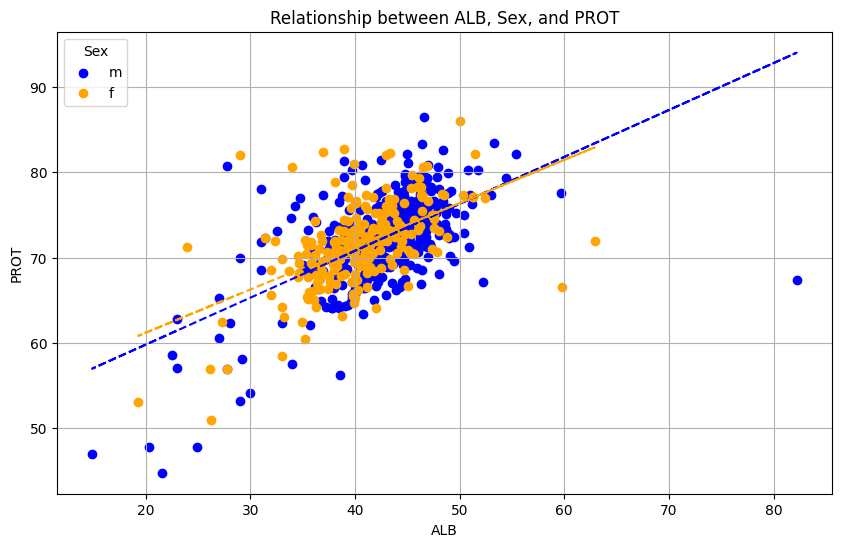

In [15]:
# Define colors for each sex
colors = {'m': 'blue', 'f': 'orange'}

# Create scatter plot
plt.figure(figsize=(10, 6))
for sex, color in colors.items():
    # Scatter plot
    plt.scatter(df[df['Sex'] == sex]['ALB'], df[df['Sex'] == sex]['PROT'], label=sex, color=color)
    
    # Fit linear regression
    X = df[df['Sex'] == sex]['ALB'].values.reshape(-1, 1)
    y = df[df['Sex'] == sex]['PROT'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot linear regression line
    plt.plot(X, model.predict(X), color=color, linestyle='--')

plt.xlabel('ALB')
plt.ylabel('PROT')
plt.title('Relationship between ALB, Sex, and PROT')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

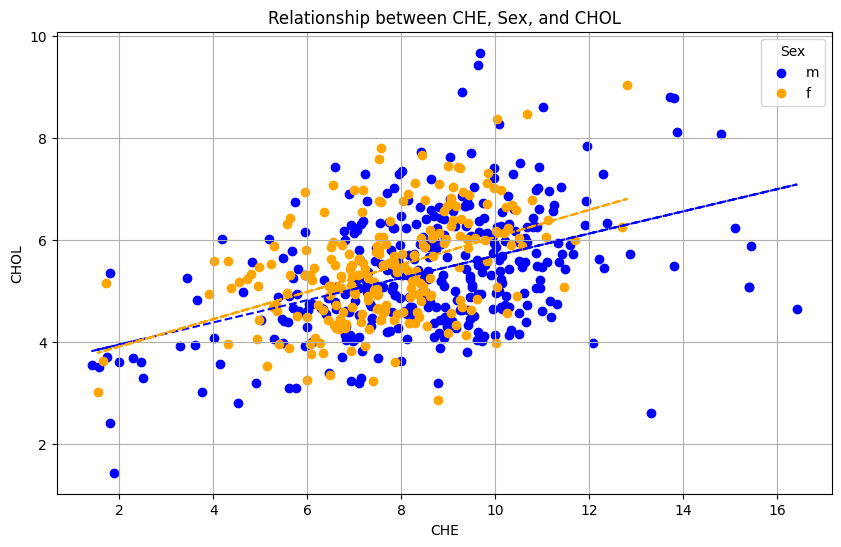

In [16]:
# Define colors for each sex
colors = {'m': 'blue', 'f': 'orange'}

# Create scatter plot
plt.figure(figsize=(10, 6))
for sex, color in colors.items():
    # Scatter plot
    plt.scatter(df[df['Sex'] == sex]['CHE'], df[df['Sex'] == sex]['CHOL'], label=sex, color=color)
    
    # Fit linear regression
    X = df[df['Sex'] == sex]['CHE'].values.reshape(-1, 1)
    y = df[df['Sex'] == sex]['CHOL'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot linear regression line
    plt.plot(X, model.predict(X), color=color, linestyle='--')

plt.xlabel('CHE')
plt.ylabel('CHOL')
plt.title('Relationship between CHE, Sex, and CHOL')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

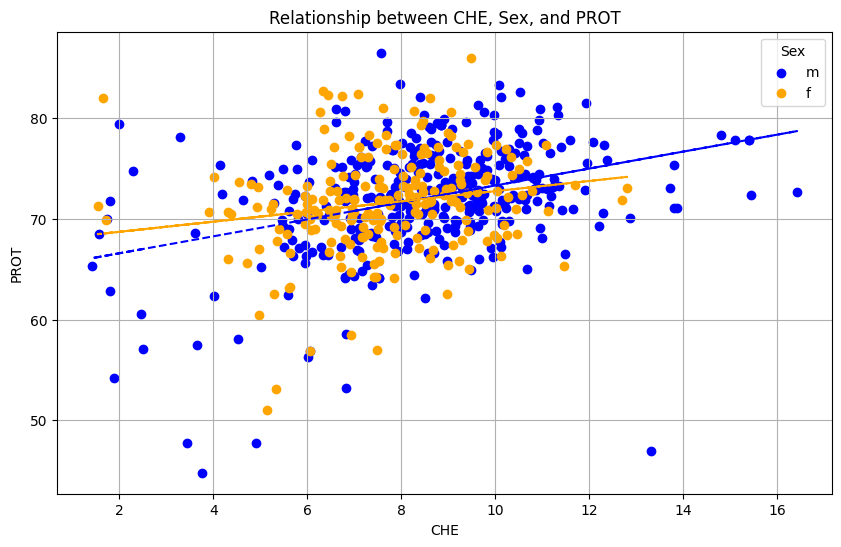

In [17]:
# Define colors for each sex
colors = {'m': 'blue', 'f': 'orange'}

# Create scatter plot
plt.figure(figsize=(10, 6))
for sex, color in colors.items():
    # Scatter plot
    plt.scatter(df[df['Sex'] == sex]['CHE'], df[df['Sex'] == sex]['PROT'], label=sex, color=color)
    
    # Fit linear regression
    X = df[df['Sex'] == sex]['CHE'].values.reshape(-1, 1)
    y = df[df['Sex'] == sex]['PROT'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot linear regression line
    plt.plot(X, model.predict(X), color=color, linestyle='--')

plt.xlabel('CHE')
plt.ylabel('PROT')
plt.title('Relationship between CHE, Sex, and PROT')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

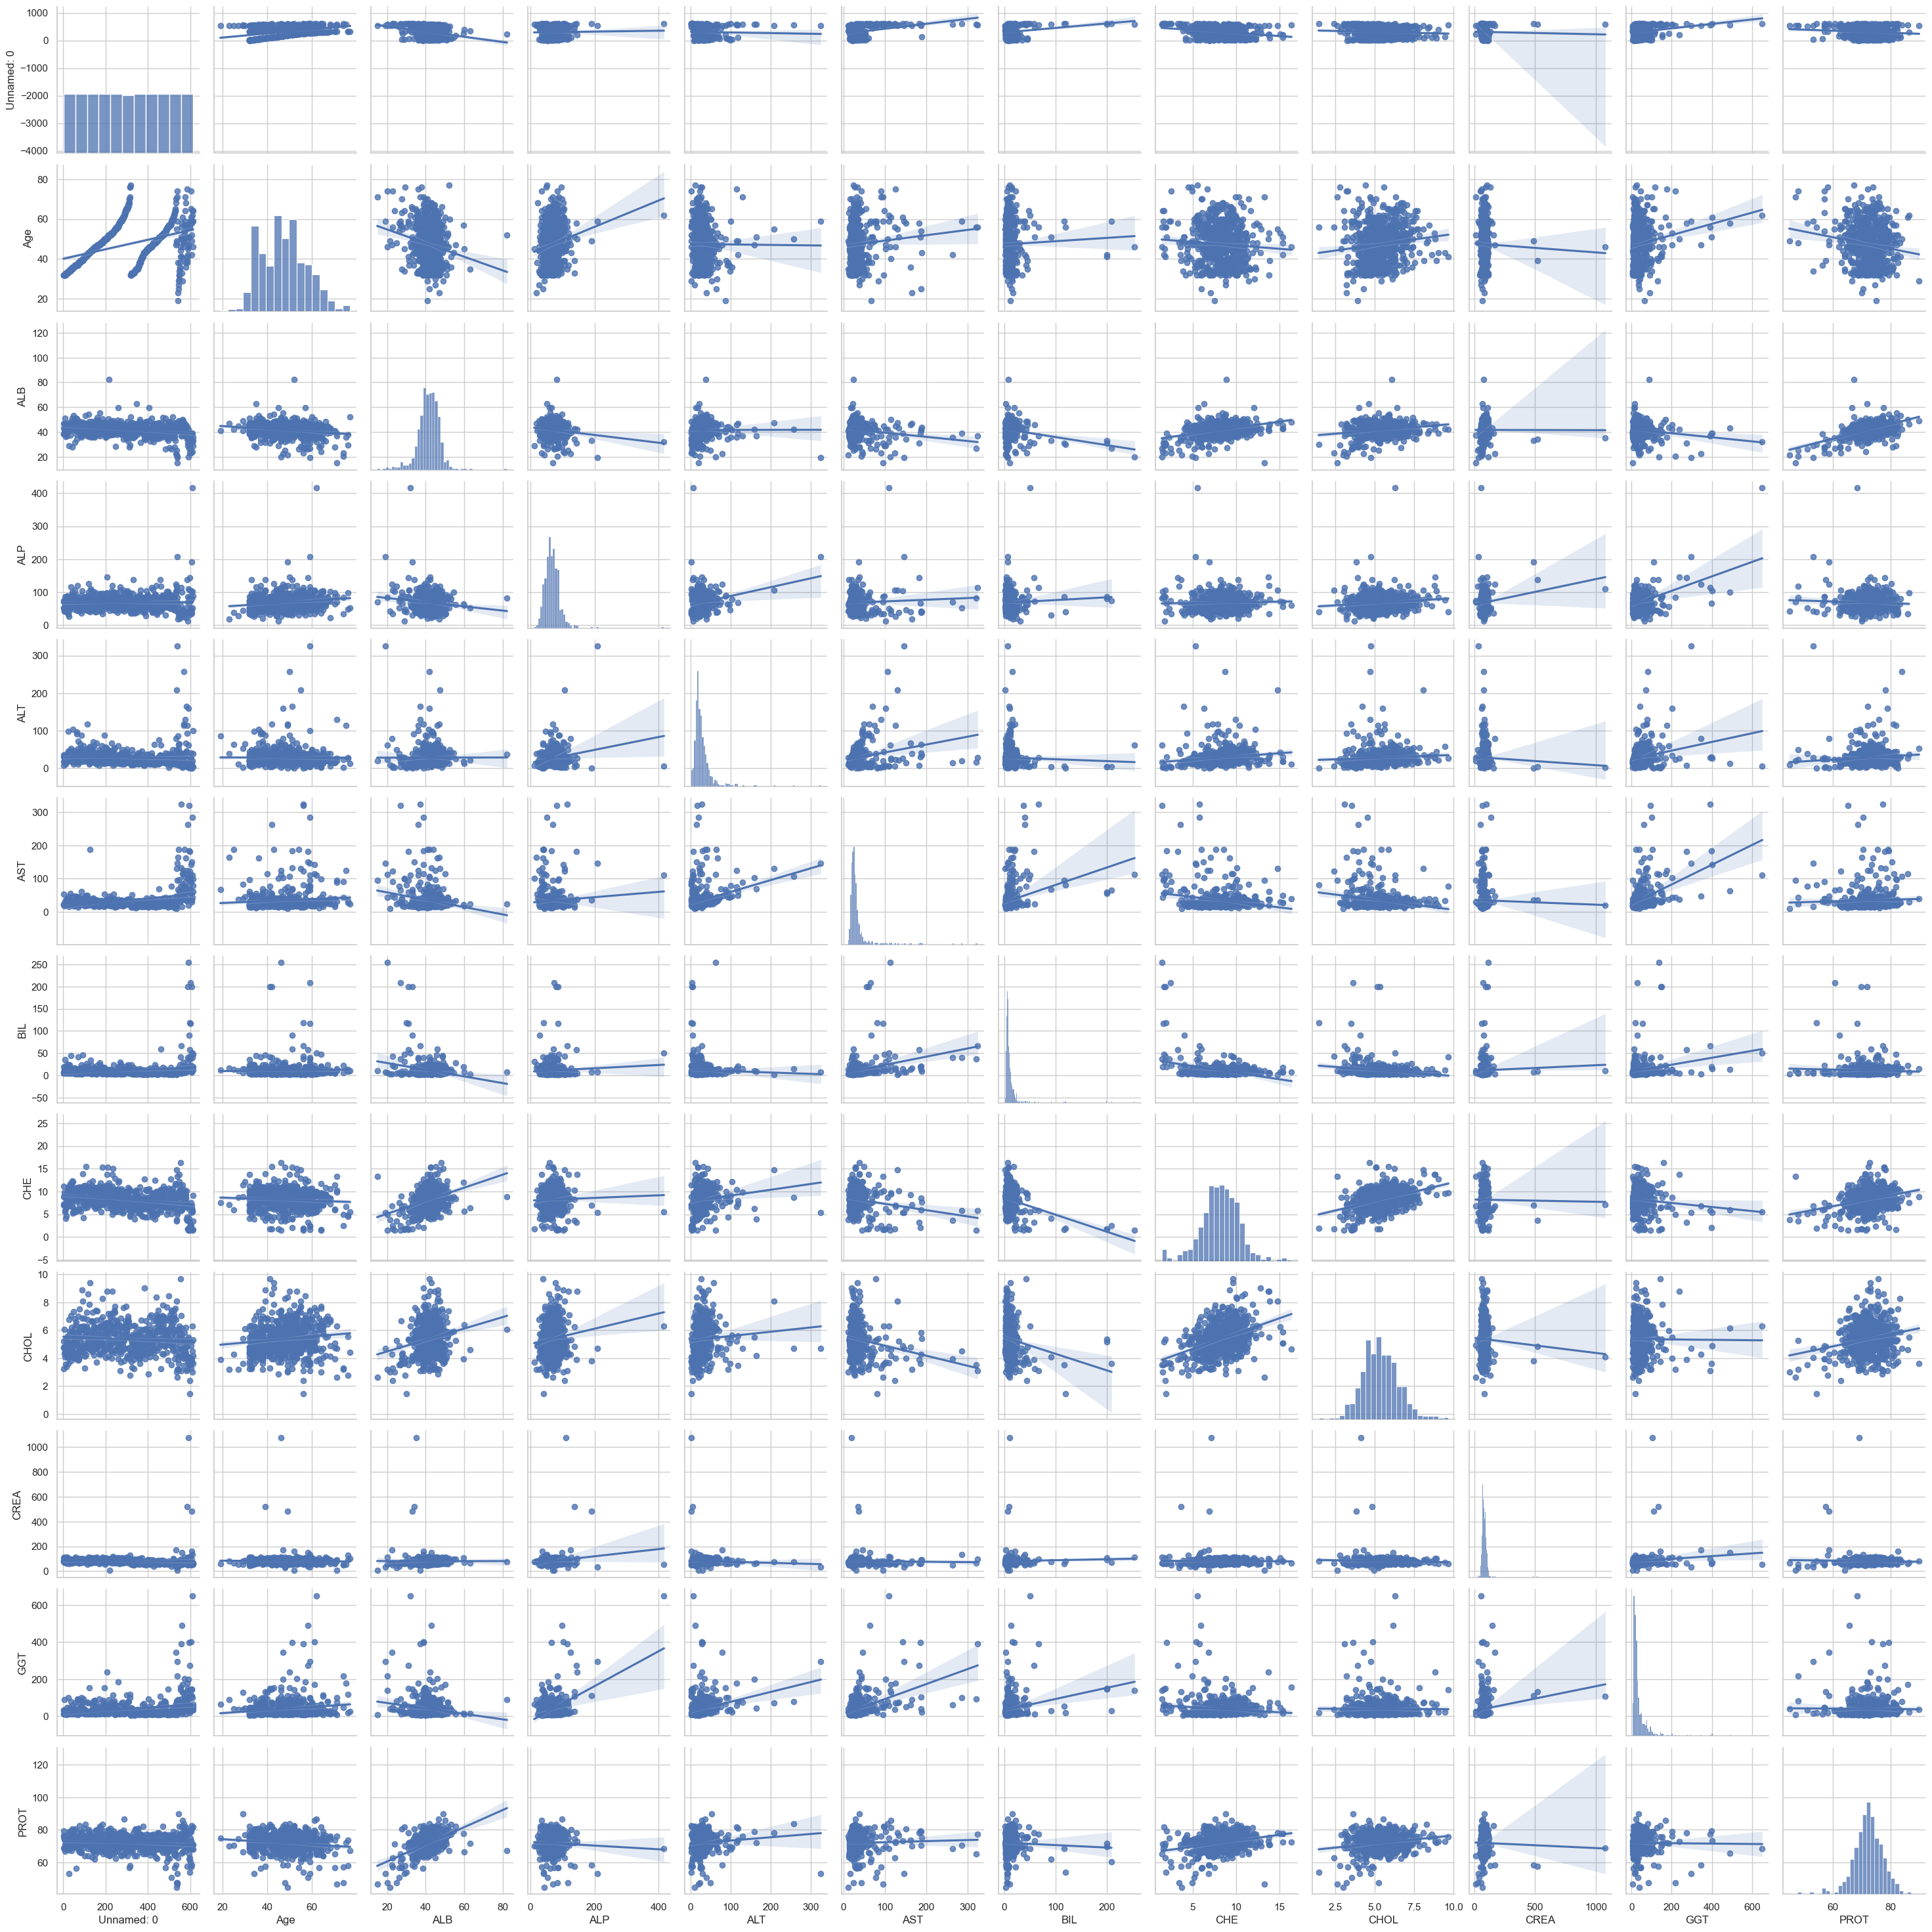

In [80]:
sns.pairplot(df, kind='reg')

Bỏ cột 0s=suspect Blood Donor do có quá ít dữ liệu, dữ liệu không liên quan và có nhiều dữ liệu nhiễu

In [42]:
df_filtered = df[df['Category'] != '0s=suspect Blood Donor']

In [43]:
df_filtered['Category'].unique()

array(['0=Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'],
      dtype=object)

Sử dụng one hot encoding để chuyển cột Sex về giá trị Boolean

In [44]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_filtered['Sex'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_filtered = pd.concat([df_filtered, one_hot_encoded], axis=1)

# Remove one of the encoded columns (e.g., remove 'm' column)
df_filtered.drop('f', axis=1, inplace=True)

# Optionally, you can also drop the original 'Sex' column
df_filtered.drop('Sex', axis=1, inplace=True)

# Display the resulting DataFrame
print(df_filtered)

     Unnamed: 0       Category  Age   ALB    ALP    ALT    AST   BIL    CHE  \
0             1  0=Blood Donor   32  38.5   52.5    7.7   22.1   7.5   6.93   
1             2  0=Blood Donor   32  38.5   70.3   18.0   24.7   3.9  11.17   
2             3  0=Blood Donor   32  46.9   74.7   36.2   52.6   6.1   8.84   
3             4  0=Blood Donor   32  43.2   52.0   30.6   22.6  18.9   7.33   
4             5  0=Blood Donor   32  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...            ...  ...   ...    ...    ...    ...   ...    ...   
610         611    3=Cirrhosis   62  32.0  416.6    5.9  110.3  50.0   5.57   
611         612    3=Cirrhosis   64  24.0  102.8    2.9   44.4  20.0   1.54   
612         613    3=Cirrhosis   64  29.0   87.3    3.5   99.0  48.0   1.66   
613         614    3=Cirrhosis   46  33.0    NaN   39.0   62.0  20.0   3.56   
614         615    3=Cirrhosis   59  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT      m  
0    3.23  1

Đổi tên cột Sex mới (m) là nam hay không thành isMale

In [45]:
# Rename the remaining column to 'isFemale'
df_filtered.rename(columns={'m': 'isMale'}, inplace=True)

# Display the resulting DataFrame
print(df_filtered)

     Unnamed: 0       Category  Age   ALB    ALP    ALT    AST   BIL    CHE  \
0             1  0=Blood Donor   32  38.5   52.5    7.7   22.1   7.5   6.93   
1             2  0=Blood Donor   32  38.5   70.3   18.0   24.7   3.9  11.17   
2             3  0=Blood Donor   32  46.9   74.7   36.2   52.6   6.1   8.84   
3             4  0=Blood Donor   32  43.2   52.0   30.6   22.6  18.9   7.33   
4             5  0=Blood Donor   32  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...            ...  ...   ...    ...    ...    ...   ...    ...   
610         611    3=Cirrhosis   62  32.0  416.6    5.9  110.3  50.0   5.57   
611         612    3=Cirrhosis   64  24.0  102.8    2.9   44.4  20.0   1.54   
612         613    3=Cirrhosis   64  29.0   87.3    3.5   99.0  48.0   1.66   
613         614    3=Cirrhosis   46  33.0    NaN   39.0   62.0  20.0   3.56   
614         615    3=Cirrhosis   59  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  isMale  
0    3.23  

Bỏ phần tử thiếu

In [46]:
# Drop all rows containing NA values
df_filtered = df_filtered.dropna()

# Display the resulting DataFrame
print(df_filtered)

     Unnamed: 0       Category  Age   ALB    ALP   ALT    AST   BIL    CHE  \
0             1  0=Blood Donor   32  38.5   52.5   7.7   22.1   7.5   6.93   
1             2  0=Blood Donor   32  38.5   70.3  18.0   24.7   3.9  11.17   
2             3  0=Blood Donor   32  46.9   74.7  36.2   52.6   6.1   8.84   
3             4  0=Blood Donor   32  43.2   52.0  30.6   22.6  18.9   7.33   
4             5  0=Blood Donor   32  39.2   74.1  32.6   24.8   9.6   9.15   
..          ...            ...  ...   ...    ...   ...    ...   ...    ...   
608         609    3=Cirrhosis   58  34.0   46.4  15.0  150.0   8.0   6.26   
609         610    3=Cirrhosis   59  39.0   51.3  19.6  285.8  40.0   5.77   
610         611    3=Cirrhosis   62  32.0  416.6   5.9  110.3  50.0   5.57   
611         612    3=Cirrhosis   64  24.0  102.8   2.9   44.4  20.0   1.54   
612         613    3=Cirrhosis   64  29.0   87.3   3.5   99.0  48.0   1.66   

     CHOL   CREA    GGT  PROT  isMale  
0    3.23  106.0   12.1

Bỏ cột unnamed (Cột đầu) do không dùng để xây dựng mô hình

In [47]:
df_filtered = df_filtered.drop(df.columns[0], axis=1)

In [48]:
df_filtered.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,isMale
0,0=Blood Donor,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True
1,0=Blood Donor,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True
2,0=Blood Donor,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True
3,0=Blood Donor,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True
4,0=Blood Donor,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True


Đổi tên cột nhãn cho dễ đọc

In [49]:
df_filtered['Category'] = df_filtered['Category'].replace('0=Blood Donor', 'Blood Donor')
df_filtered['Category'] = df_filtered['Category'].replace('1=Hepatitis', 'Hepatitis')
df_filtered['Category'] = df_filtered['Category'].replace('2=Fibrosis', 'Fibrosis')
df_filtered['Category'] = df_filtered['Category'].replace('3=Cirrhosis', 'Cirrhosis')

In [50]:
df_filtered.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,isMale
0,Blood Donor,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,True
1,Blood Donor,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,True
2,Blood Donor,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,True
3,Blood Donor,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,True
4,Blood Donor,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,True


<h2>Xây dựng mô hình dự đoán Cây quyết định</h2>

Ưu điểm: Dễ hiểu dễ diễn giải, không bị lệ thuộc và xử lý tốt dữ liệu nhiễu, không bị ảnh hưởng nếu tập dữ liệu chưa được chuẩn hóa, có thể xử lý cả bài toán phân lớp và hồi quy

Nhược điểm: Quá khớp dữ liệu huấn luyện (Overfitting), nhạy cảm với dữ liệu (dễ bị thay đổi nếu dữ liệu thay đổi), không xử lý tốt với tập dữ liệu tuyến tính

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [52]:
# Separate features (X) and target variable (y)
X = df_filtered.drop(columns=['Category'])
y = df_filtered['Category']

# Loop to train the model ten times
f1_scores = []
precision_scores = []
recall_scores = []

for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train decision tree classifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append scores to lists
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print scores for each loop
    print(f"Loop {i + 1}: F1 Score: {f1}, Precision: {precision}, Recall: {recall}")
    print("Confusion Matrix:")
    print(cm)
    print()

# Calculate average scores
avg_f1 = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)

# Print average scores
print(f"Average F1 Score: {avg_f1}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")

Loop 1: F1 Score: 0.9284023319111038, Precision: 0.9284493284493284, Recall: 0.9316239316239316
Confusion Matrix:
[[102   0   1   1]
 [  1   4   0   0]
 [  1   0   1   2]
 [  1   1   0   2]]

Loop 2: F1 Score: 0.9146690518783541, Precision: 0.9148464704020259, Recall: 0.9230769230769231
Confusion Matrix:
[[104   3   0   0]
 [  0   2   0   0]
 [  1   1   0   1]
 [  3   0   0   2]]

Loop 3: F1 Score: 0.9658119658119658, Precision: 0.9672364672364673, Recall: 0.9658119658119658
Confusion Matrix:
[[109   0   1   0]
 [  0   2   0   0]
 [  0   0   1   1]
 [  1   0   1   1]]

Loop 4: F1 Score: 0.9500328731097962, Precision: 0.9658119658119658, Recall: 0.9401709401709402
Confusion Matrix:
[[105   0   0   2]
 [  1   5   1   1]
 [  0   0   0   1]
 [  1   0   0   0]]

Loop 5: F1 Score: 0.9585892300845571, Precision: 0.9641025641025641, Recall: 0.9572649572649573
Confusion Matrix:
[[106   0   0   2]
 [  0   3   0   0]
 [  0   2   1   0]
 [  0   0   1   2]]

Loop 6: F1 Score: 0.954131054131054, Pre

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Loop 16: F1 Score: 0.932573599240266, Precision: 0.9337606837606838, Recall: 0.9316239316239316
Confusion Matrix:
[[101   0   0   1]
 [  0   7   1   0]
 [  0   0   0   2]
 [  1   1   2   1]]

Loop 17: F1 Score: 0.9098312786786307, Precision: 0.9091801202912313, Recall: 0.9145299145299145
Confusion Matrix:
[[104   0   0   2]
 [  0   1   0   2]
 [  2   1   1   0]
 [  2   0   1   1]]

Loop 18: F1 Score: 0.9335232668566003, Precision: 0.9358974358974359, Recall: 0.9316239316239316
Confusion Matrix:
[[106   1   1   1]
 [  0   1   0   1]
 [  1   0   0   0]
 [  2   0   1   2]]

Loop 19: F1 Score: 0.9630399630399631, Precision: 0.966117216117216, Recall: 0.9658119658119658
Confusion Matrix:
[[110   0   0   0]
 [  1   2   1   0]
 [  0   0   1   1]
 [  1   0   0   0]]

Loop 20: F1 Score: 0.9247862075916374, Precision: 0.9327635327635327, Recall: 0.9230769230769231
Confusion Matrix:
[[101   1   0   1]
 [  0   4   1   1]
 [  0   0   0   4]
 [  0   0   1   3]]

Average F1 Score: 0.9349989962089376


<h2>=> Độ chính xác F1 trung bình của mô hình cây quyết định là 0.93</h2>

<h2>SVM</h2>

In [53]:
# Separate features (X) and target variable (y)
X = df_filtered.drop(columns=['Category'])
y = df_filtered['Category']

# Loop to train the model ten times
f1_scores = []
precision_scores = []
recall_scores = []

for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train decision tree classifier
    classifier = SVC(kernel='linear')
    classifier.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append scores to lists
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print scores for each loop
    print(f"Loop {i + 1}: F1 Score: {f1}, Precision: {precision}, Recall: {recall}")
    print("Confusion Matrix:")
    print(cm)
    print()

# Calculate average scores
avg_f1 = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)

# Print average scores
print(f"Average F1 Score: {avg_f1}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")

Loop 1: F1 Score: 0.9502053502053502, Precision: 0.9476159759178627, Recall: 0.9572649572649573
Confusion Matrix:
[[104   0   0   0]
 [  0   5   0   0]
 [  2   0   1   1]
 [  0   1   1   2]]

Loop 2: F1 Score: 0.9701646090534979, Precision: 0.9746726260487729, Recall: 0.9743589743589743
Confusion Matrix:
[[107   0   0   0]
 [  0   2   0   0]
 [  1   0   1   1]
 [  1   0   0   4]]

Loop 3: F1 Score: 0.9701048072088797, Precision: 0.9658889658889659, Recall: 0.9743589743589743
Confusion Matrix:
[[110   0   0   0]
 [  0   2   0   0]
 [  1   0   0   1]
 [  0   0   1   2]]

Loop 4: F1 Score: 0.9840455840455841, Precision: 0.9871794871794872, Recall: 0.9829059829059829
Confusion Matrix:
[[107   0   0   0]
 [  0   7   1   0]
 [  0   0   0   1]
 [  0   0   0   1]]

Loop 5: F1 Score: 0.9451333579773947, Precision: 0.934071484071484, Recall: 0.9572649572649573
Confusion Matrix:
[[108   0   0   0]
 [  0   3   0   0]
 [  1   0   0   2]
 [  1   1   0   1]]

Loop 6: F1 Score: 0.9517441936796776, Pre

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<h2>=> Độ chính xác F1 trung bình của mô hình SVM (Vecto hỗ trợ) là 0.96</h2>

<h2>KNN</h2>

In [54]:
# Separate features (X) and target variable (y)
X = df_filtered.drop(columns=['Category'])
y = df_filtered['Category']

# Loop to train the model ten times
f1_scores = []
precision_scores = []
recall_scores = []

for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train decision tree classifier
    k=5
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append scores to lists
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print scores for each loop
    print(f"Loop {i + 1}: F1 Score: {f1}, Precision: {precision}, Recall: {recall}")
    print("Confusion Matrix:")
    print(cm)
    print()

# Calculate average scores
avg_f1 = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)

# Print average scores
print(f"Average F1 Score: {avg_f1}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")

Loop 1: F1 Score: 0.8773345995568217, Precision: 0.8538868538868538, Recall: 0.905982905982906
Confusion Matrix:
[[104   0   0   0]
 [  2   2   0   1]
 [  4   0   0   0]
 [  2   1   1   0]]

Loop 2: F1 Score: 0.9154774335769811, Precision: 0.9011096116359274, Recall: 0.9401709401709402
Confusion Matrix:
[[107   0   0   0]
 [  0   2   0   0]
 [  2   0   1   0]
 [  5   0   0   0]]

Loop 3: F1 Score: 0.9552910052910052, Precision: 0.9499175288648973, Recall: 0.9658119658119658
Confusion Matrix:
[[110   0   0   0]
 [  1   1   0   0]
 [  2   0   0   0]
 [  1   0   0   2]]

Loop 4: F1 Score: 0.9563576077337546, Precision: 0.94994994994995, Recall: 0.9658119658119658
Confusion Matrix:
[[107   0   0   0]
 [  2   6   0   0]
 [  1   0   0   0]
 [  1   0   0   0]]

Loop 5: F1 Score: 0.9463294696171408, Precision: 0.9365904365904366, Recall: 0.9572649572649573
Confusion Matrix:
[[108   0   0   0]
 [  0   3   0   0]
 [  2   0   0   1]
 [  1   0   1   1]]

Loop 6: F1 Score: 0.9485582910240444, Preci

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Loop 14: F1 Score: 0.921415004748338, Precision: 0.9160839160839161, Recall: 0.9316239316239316
Confusion Matrix:
[[105   0   0   1]
 [  0   3   0   2]
 [  0   0   1   0]
 [  5   0   0   0]]

Loop 15: F1 Score: 0.9062201948994402, Precision: 0.894560756946078, Recall: 0.9230769230769231
Confusion Matrix:
[[103   0   0   0]
 [  2   4   0   0]
 [  2   0   1   1]
 [  2   0   2   0]]

Loop 16: F1 Score: 0.9110008895076769, Precision: 0.8914511996273004, Recall: 0.9316239316239316
Confusion Matrix:
[[101   0   0   1]
 [  0   8   0   0]
 [  1   0   0   1]
 [  4   1   0   0]]

Loop 17: F1 Score: 0.8858585858585858, Precision: 0.8680461838356576, Recall: 0.9145299145299145
Confusion Matrix:
[[106   0   0   0]
 [  1   1   0   1]
 [  3   0   0   1]
 [  4   0   0   0]]

Loop 18: F1 Score: 0.9235389235389236, Precision: 0.9074956508584827, Recall: 0.9401709401709402
Confusion Matrix:
[[108   0   1   0]
 [  0   2   0   0]
 [  1   0   0   0]
 [  4   0   1   0]]

Loop 19: F1 Score: 0.9420702754036088

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

<h2>=> Độ chính xác F1 trung bình của mô hình KNN(k=5) là 0.91</h2>

In [53]:
import pickle

# Save the trained model to a file using pickle
with open('dectree_HCV_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

Thử dự đoán 

In [54]:
# Age, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, isMale
X_new = [[50, 50, 50, 30, 25, 10, 8, 5, 80, 30, 70, True]]

classifier.predict(X_new)

array(['Hepatitis'], dtype=object)

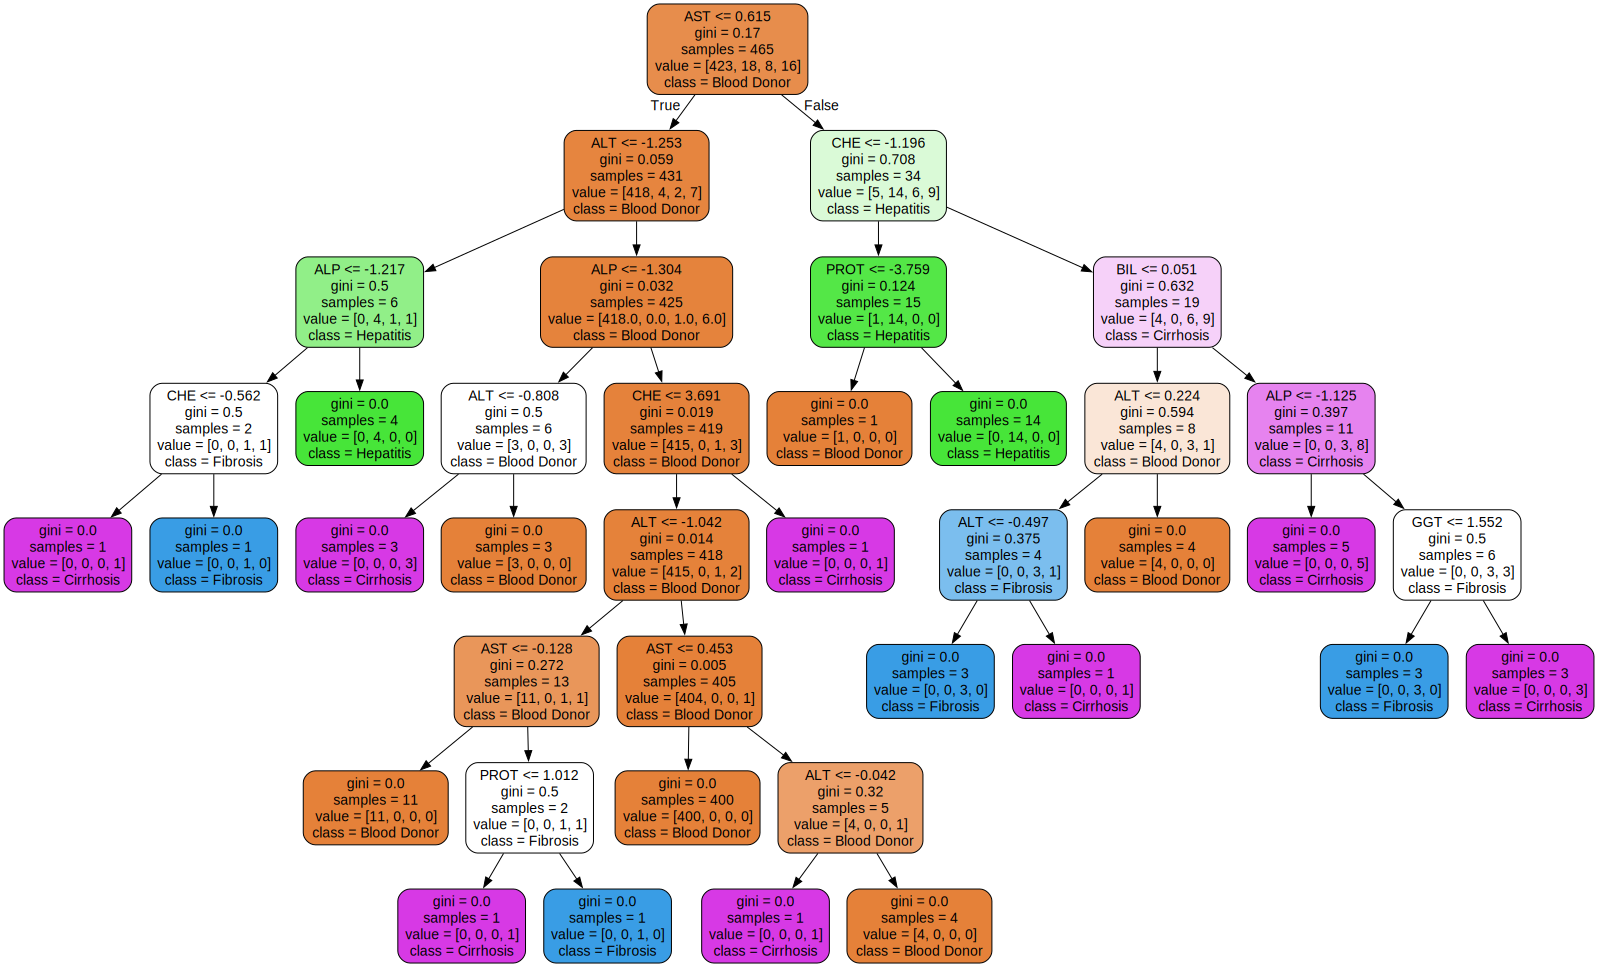

In [55]:
from sklearn.tree import export_graphviz
import graphviz

# Assuming 'loaded_model' is your trained decision tree model

# Export the decision tree to a DOT file
export_graphviz(classifier, out_file='decision_tree.dot', 
                feature_names=['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'isMale'],
                class_names=['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                filled=True, rounded=True)

# Convert the DOT file to a graphical representation (PNG format)
# Ensure you have Graphviz installed and added to your system's PATH
graphviz.render('dot', 'png', 'decision_tree.dot')

# Display the decision tree (assuming you're using Jupyter Notebook or a similar environment)
graphviz.Source.from_file('decision_tree.dot')